# SC1015 DSAI Mini Project
## Part 2: Exploratory Data Analysis
---
In the second section, we explore our dataset more generally. We explore our variables both categorical (`4`in total) and numerical (`13` in total) that are related to the features of each website's URL. What is their relationship with respect to variable `phish`(whether or not a URL is a phishing URL or benign). Are there any patterns we can notice? What is the underlying relationship between them? Can we make any inferences for our question through EDA? This is will help us in the later sections of our project and answer the question posed.

**Question:** Can we detect phishing websites from benign ones using their respective URLs?

## Table of Contents:
1. [Class Analysis](#1\.-Class-Analysis)
2. [Class Analysis Conclusion](#2\.-Class-Analysis-Conclusion)
3. [Exploring Numerical Variables](#3\.-Exploring-Numerical-Variables)
4. [Correlation Matrix Analysis](#4\.-Correlation-Matrix-Analysis)
5. [Numerical Variables Analysis](#5\.-Numerical-Variables-Analysis)
6. [Exploring Categorical Variables](#6\.-Exploring-Categorical-Variables)
7. [Categorical Variable Analysis](#7\.-Categorical-Variable-Analysis)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
import scipy.stats as stats 
sb.set() # set the default Seaborn style for graphics
plt.ion() #ensure plots appear automatically

In [2]:
# Import data
df = pd.read_csv("cleaned_data.csv",index_col=0)

In [3]:
df.shape

(730189, 19)

In [4]:
# View data
df.head()

,url,phish,use_of_ip,short_url,uses-https,uses-http,count.,count@,count_dir,count_embed_domain,count%,count?,count-,count=,url_length,hostname_length,count-digits,count-letters,url_entropy
0,https://obmen.click/,phishing,not IP,original,https,http,1,0,1,0,0,0,0,0,20,11,0,15,3.884184
1,https://neueinrichtung-sparkasse.de/,phishing,not IP,original,https,http,1,0,1,0,0,0,1,0,36,27,0,30,3.995907
2,https://3db32516c1b476e7eff40e2d8ff8d9d7.krokl...,phishing,not IP,original,https,http,3,0,5,0,0,0,0,0,100,45,36,53,4.711532
3,https://f0d89a41642e0026589577e0e13d9d58.krokl...,phishing,not IP,original,https,http,3,0,5,0,0,0,0,0,100,45,42,47,4.743081
4,https://ratnes.com/,phishing,not IP,original,https,http,1,0,1,0,0,0,0,0,19,10,0,14,3.642150


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730189 entries, 0 to 730188
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   url                 730189 non-null  object 
 1   phish               730189 non-null  object 
 2   use_of_ip           730189 non-null  object 
 3   short_url           730189 non-null  object 
 4   uses-https          730189 non-null  object 
 5   uses-http           730189 non-null  object 
 6   count.              730189 non-null  int64  
 7   count@              730189 non-null  int64  
 8   count_dir           730189 non-null  int64  
 9   count_embed_domain  730189 non-null  int64  
 10  count%              730189 non-null  int64  
 11  count?              730189 non-null  int64  
 12  count-              730189 non-null  int64  
 13  count=              730189 non-null  int64  
 14  url_length          730189 non-null  int64  
 15  hostname_length     730189 non-nul

### 1. Class Analysis

We can observe the number of phishing URLs and benign URLs.

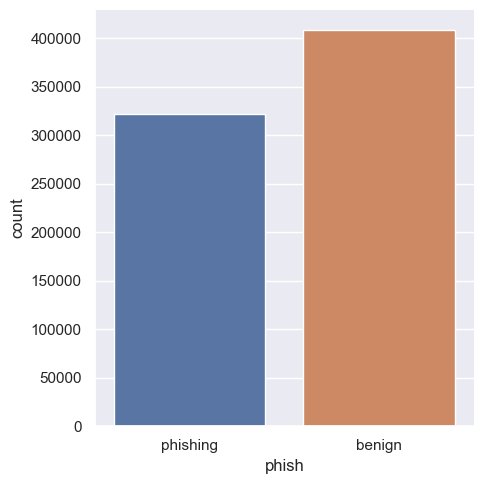

In [6]:
#Class analysis
sb.catplot(x="phish", data=df, kind="count")

### 2. Class Analysis Conclusion
Although the dataset is not perfectly balanced, the number of phishing URLs is still >40% of the entire dataset, thus it is balanced sufficiently without the need to oversample phishing URLs or undersample benign URLs. It might be cautious to not do so as well in the context of phishing URLs. For example, if we use data augmentation to oversample phishing URLs this might corrupt the results, as a simple augmentation of URLs is the difference between a benign, legitimate URL and a typosquatted URL.

### 3. Exploring Numerical Variables

In [7]:
# Extract only the numeric data variables
numbers = ['count.','count@','count_dir','count_embed_domain','count%','count?','count-','count=','url_length','hostname_length','count-digits','count-letters',"url_entropy"]
numeric_data = pd.DataFrame(df[numbers])

# Summary Statistics for all Variables
numeric_data.describe().round(2)

,count.,count@,count_dir,count_embed_domain,count%,count?,count-,count=,url_length,hostname_length,count-digits,count-letters,url_entropy
count,730189.00,730189.00,730189.00,730189.00,730189.00,730189.00,730189.00,730189.00,730189.00,730189.00,730189.00,730189.00,730189.00
mean,2.17,0.01,2.08,0.00,0.09,0.14,1.03,0.25,49.60,6.39,4.37,37.96,4.10
std,1.54,0.09,1.60,0.07,1.13,0.43,2.22,0.90,44.06,12.06,11.36,31.49,0.37
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,-0.00
25%,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,28.00,0.00,0.00,22.00,3.88
50%,2.00,0.00,2.00,0.00,0.00,0.00,0.00,0.00,39.00,0.00,0.00,31.00,4.10
75%,3.00,0.00,3.00,0.00,0.00,0.00,1.00,0.00,57.00,12.00,5.00,44.00,4.34
max,43.00,10.00,102.00,51.00,253.00,166.00,48.00,51.00,6097.00,236.00,865.00,5196.00,7.11


                      count.    count@  count_dir  count_embed_domain  \
count.              1.000000  0.121857   0.087264            0.011568   
count@              0.121857  1.000000   0.043459            0.013656   
count_dir           0.087264  0.043459   1.000000            0.104773   
count_embed_domain  0.011568  0.013656   0.104773            1.000000   
count%              0.143074  0.034723   0.018305            0.001872   
count?              0.246657  0.104149   0.017685            0.000067   
count-             -0.010437 -0.007310   0.232418           -0.001428   
count=              0.314446  0.096172   0.056907           -0.000758   
url_length          0.469632  0.100241   0.389160            0.015030   
hostname_length     0.252671  0.049442  -0.231011            0.003302   
count-digits        0.371458  0.056068   0.245047            0.001830   
count-letters       0.423420  0.094198   0.384883            0.014152   
url_entropy         0.344005  0.097973   0.401149  

<AxesSubplot:>

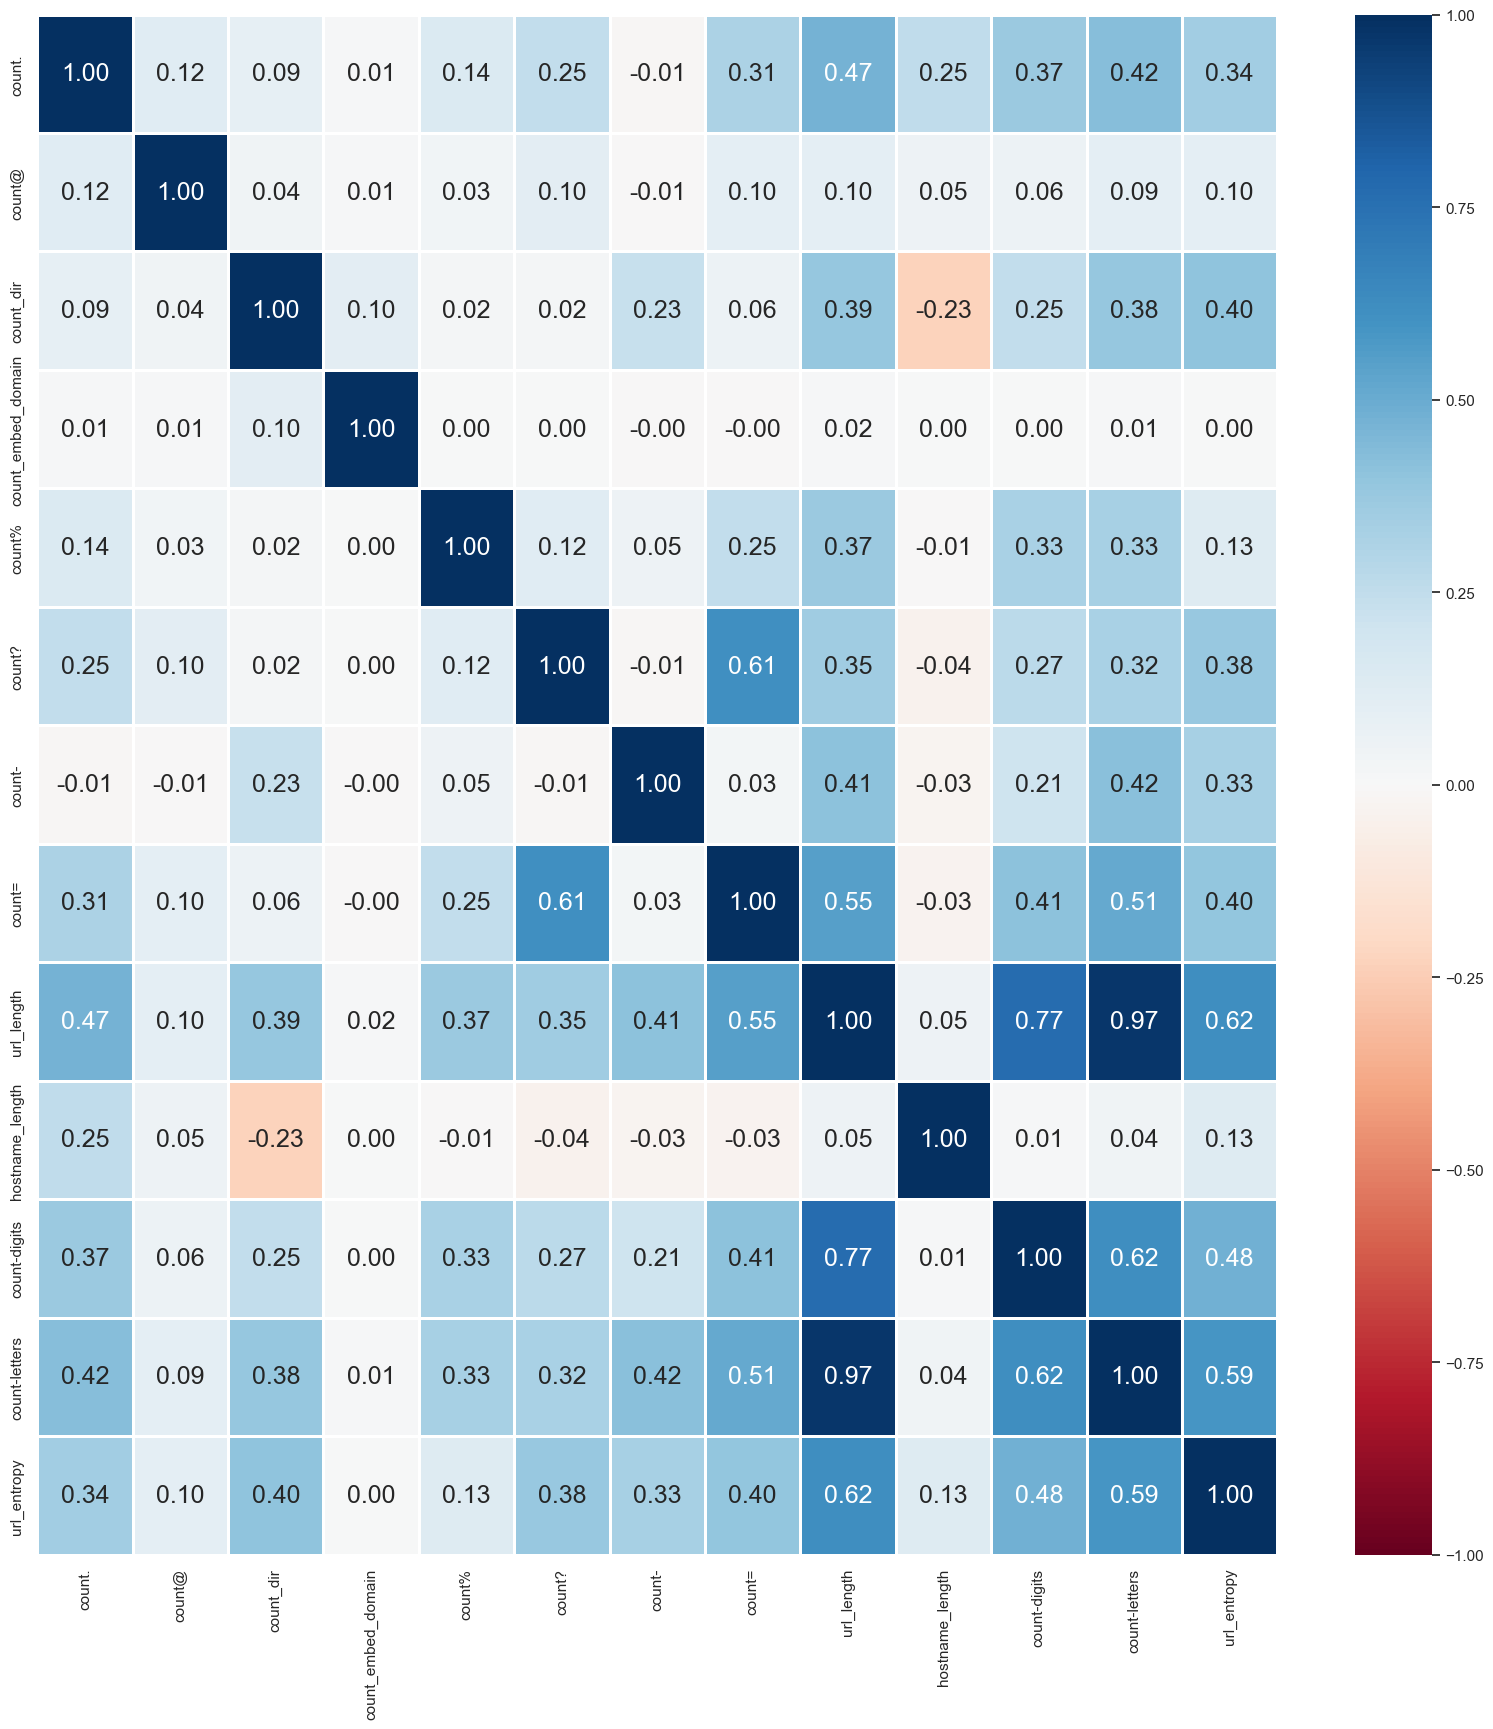

In [8]:
# Correlation Matrix
print(numeric_data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

### 4. Correlation Matrix Analysis
From the correlation matrix, a few intuitive obersavations can be made. 

1. The URLs that are very long are strongly positively correlated with long hostnames, large number of digits, large number of letters and greater URL entropy.

2. Interestingly, the number of `?` and the number of `=` have a strong positive correlation as well. This might indicate that they regularly appear together in the same URL. This is common when trying to reference an id/token of a object (e.g. in the case of a youtube video for example: https://www.youtube.com/watch?v=9mplI5qEhxk)

3. Additionally, URLs that are able to return a hostname also tend to use https or http

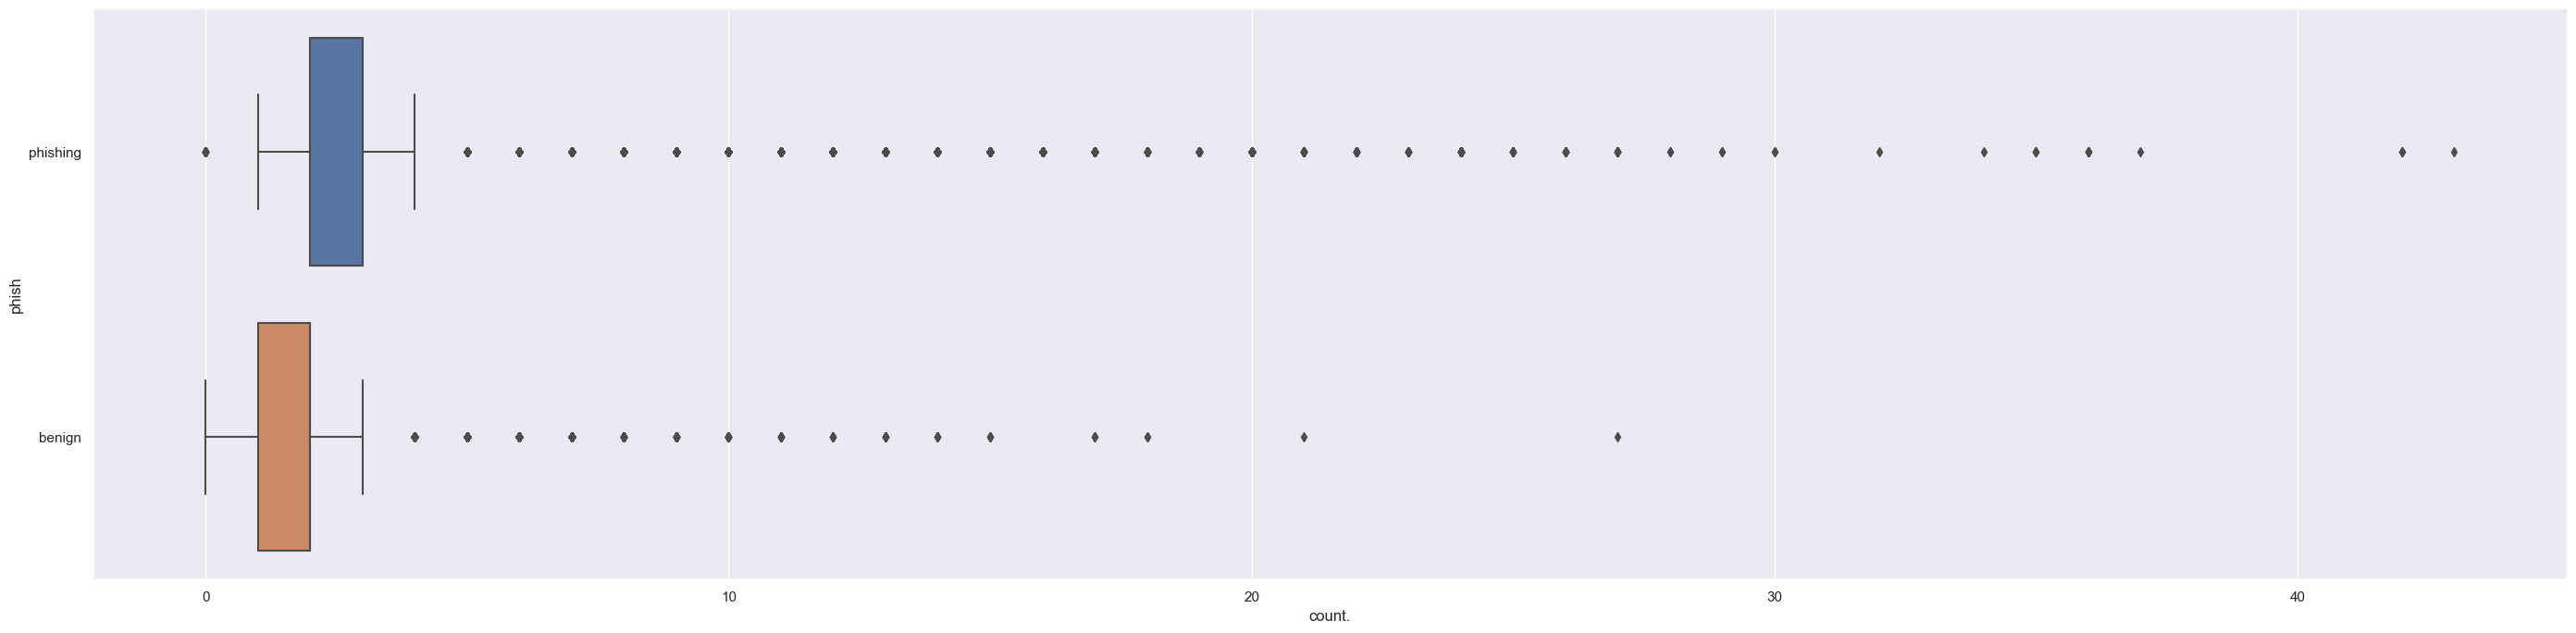

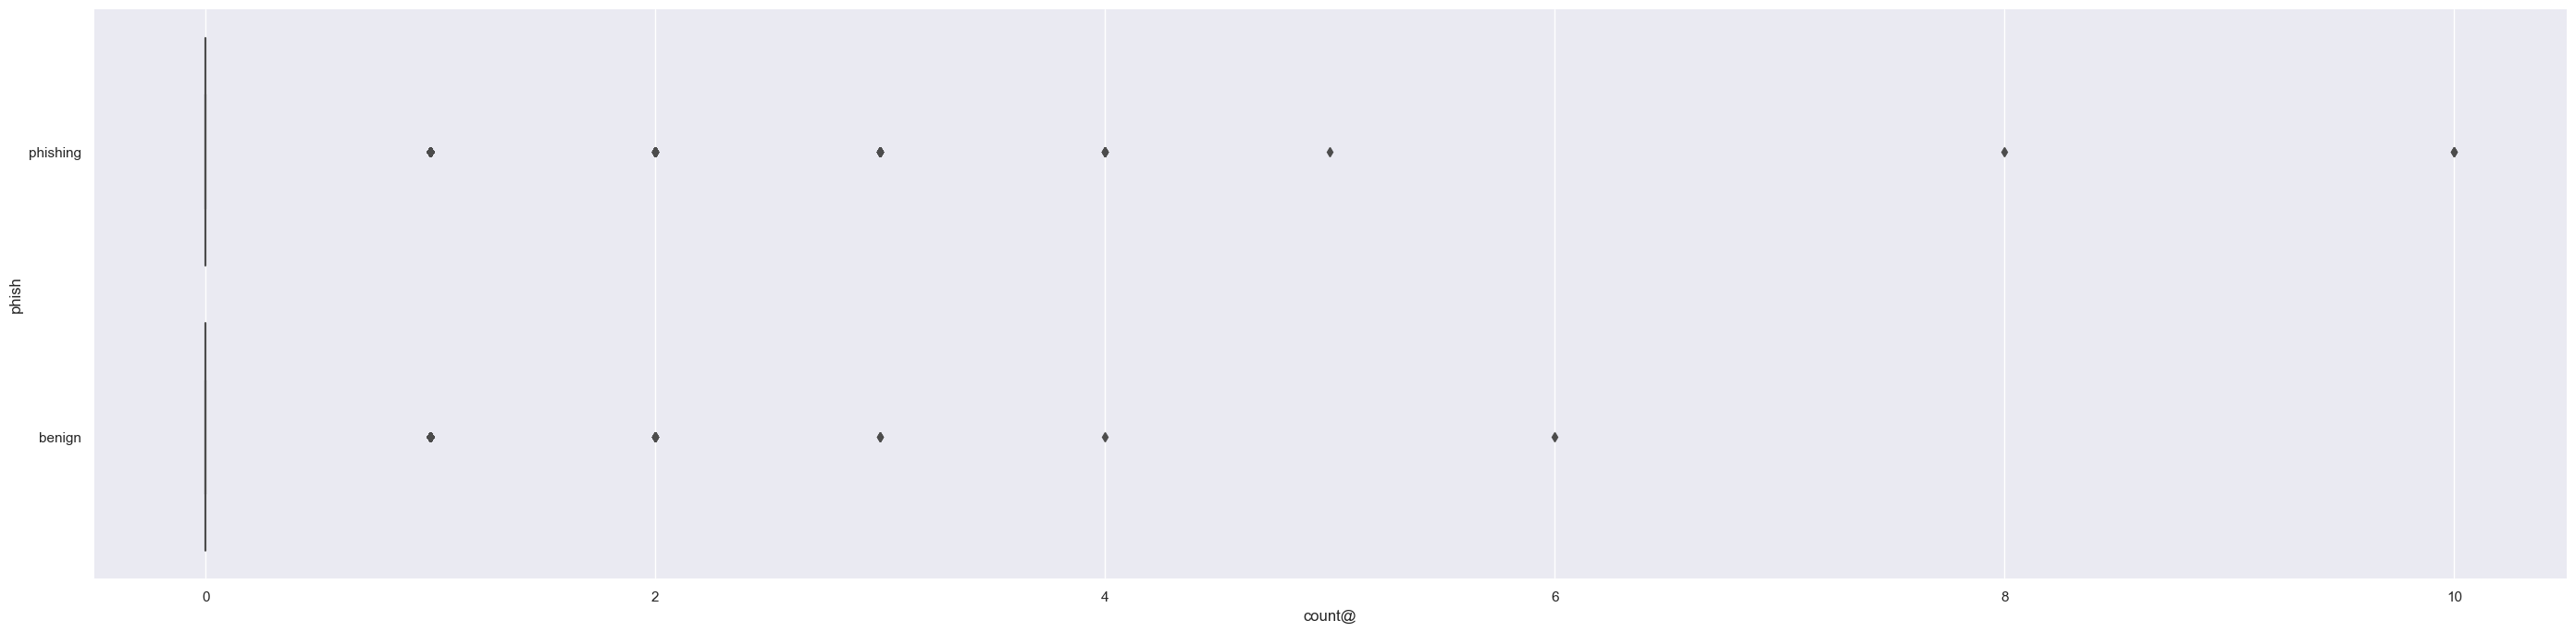

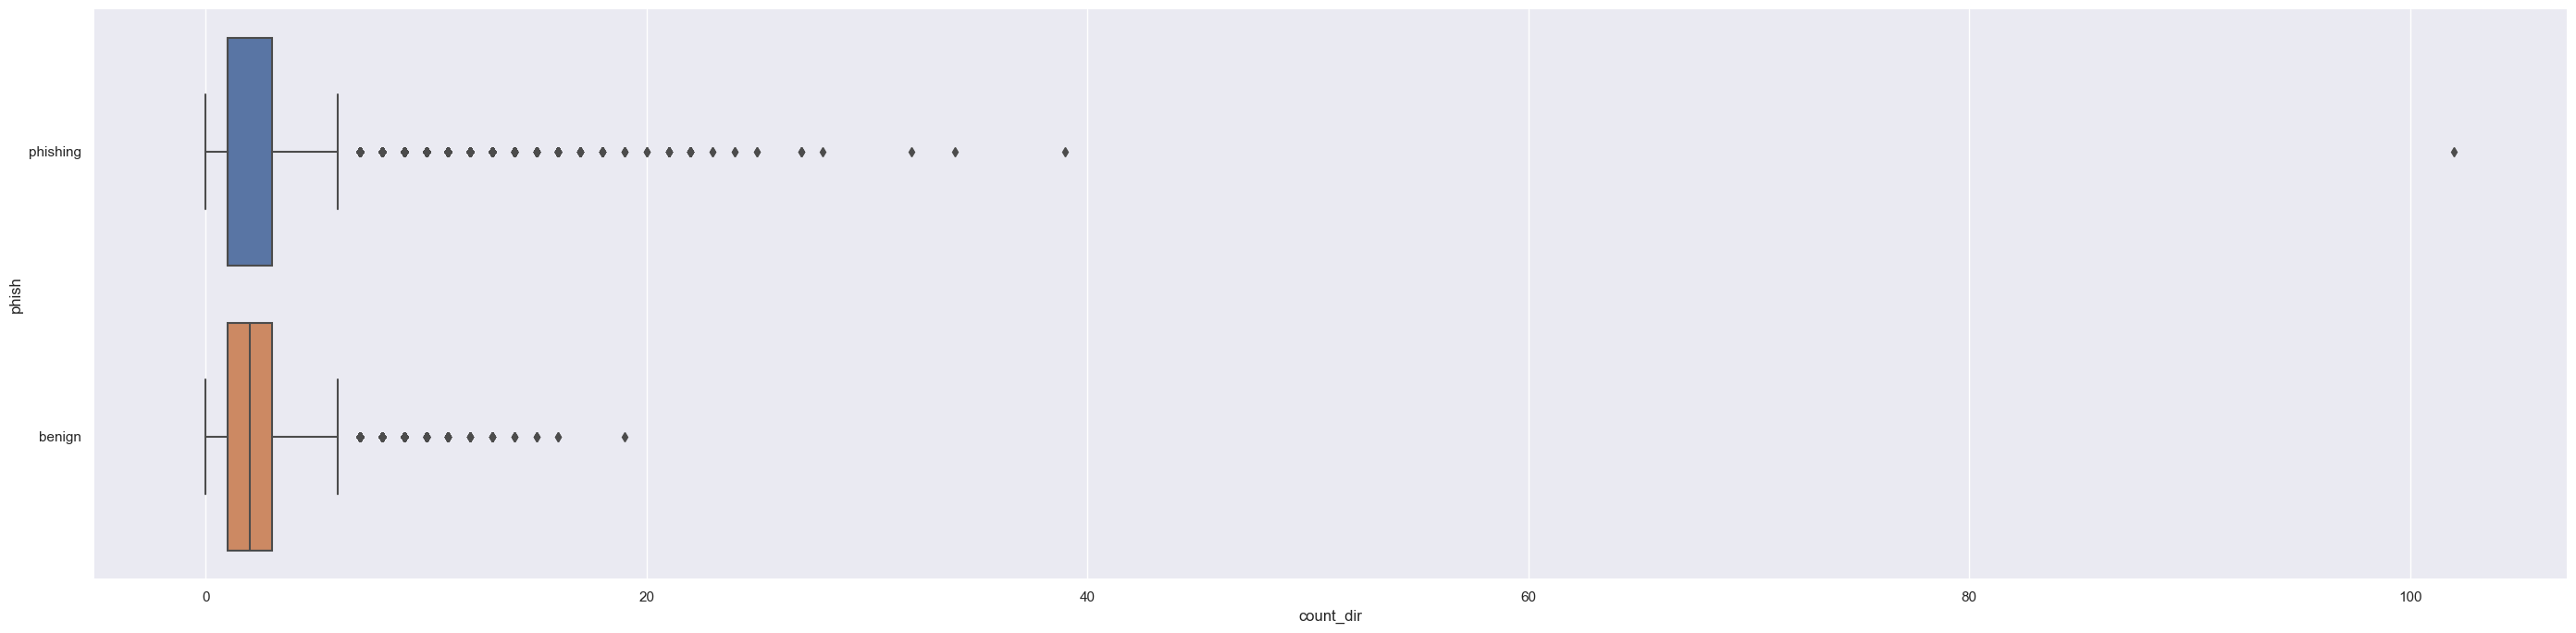

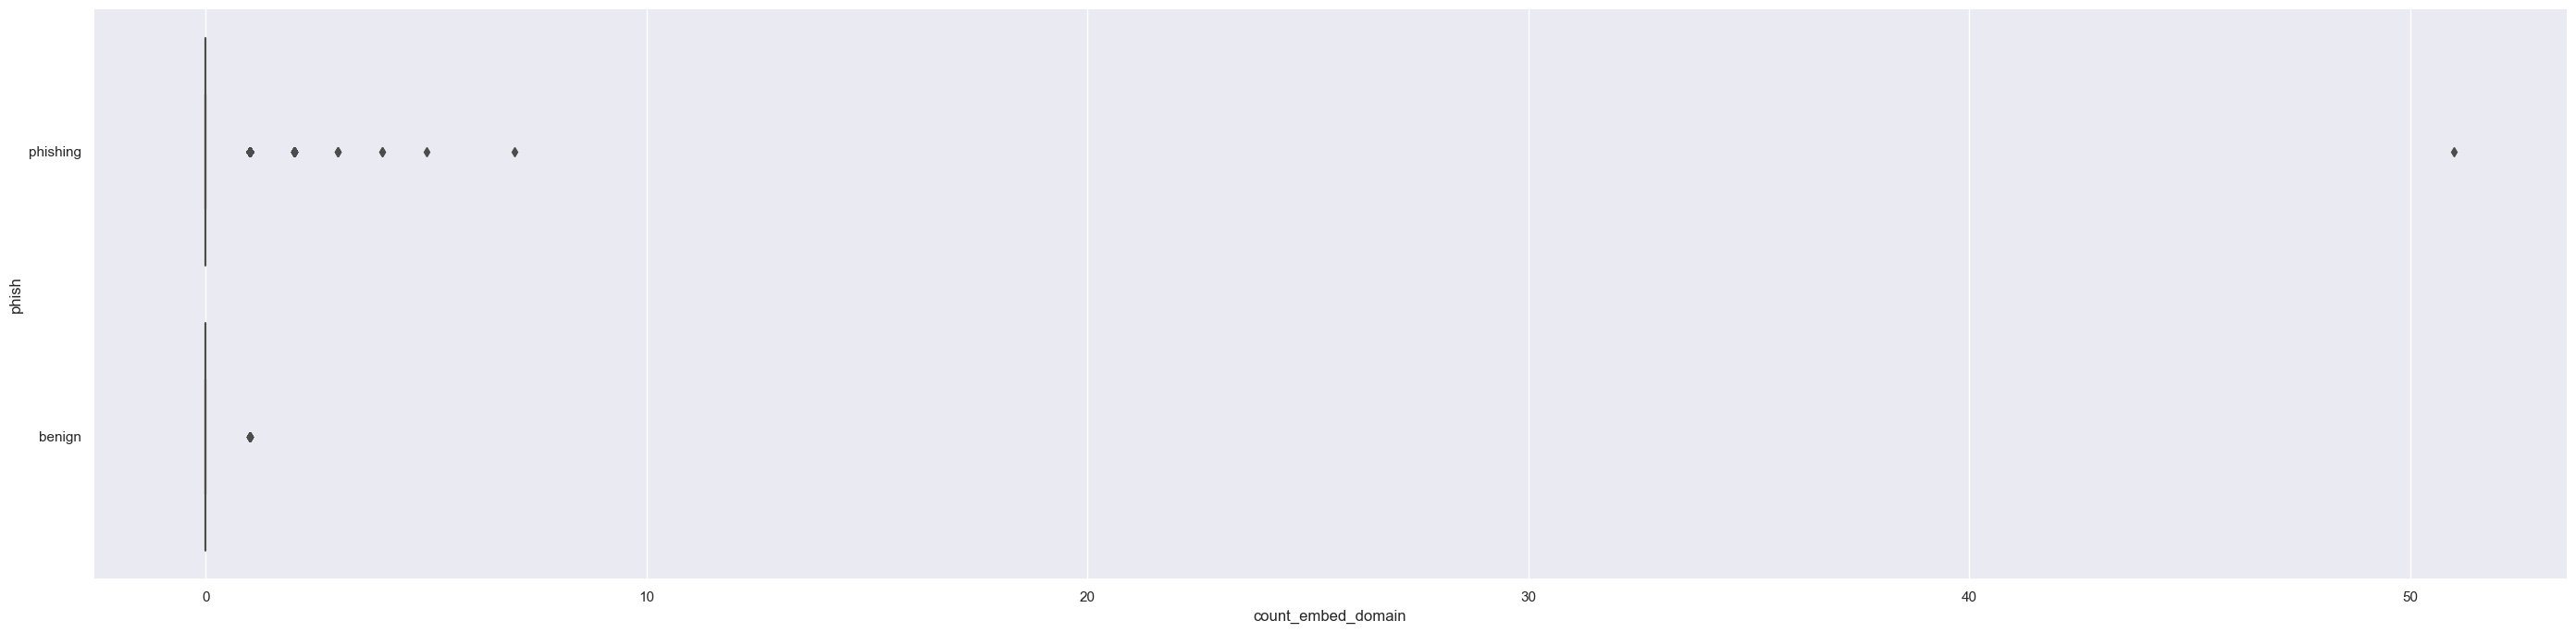

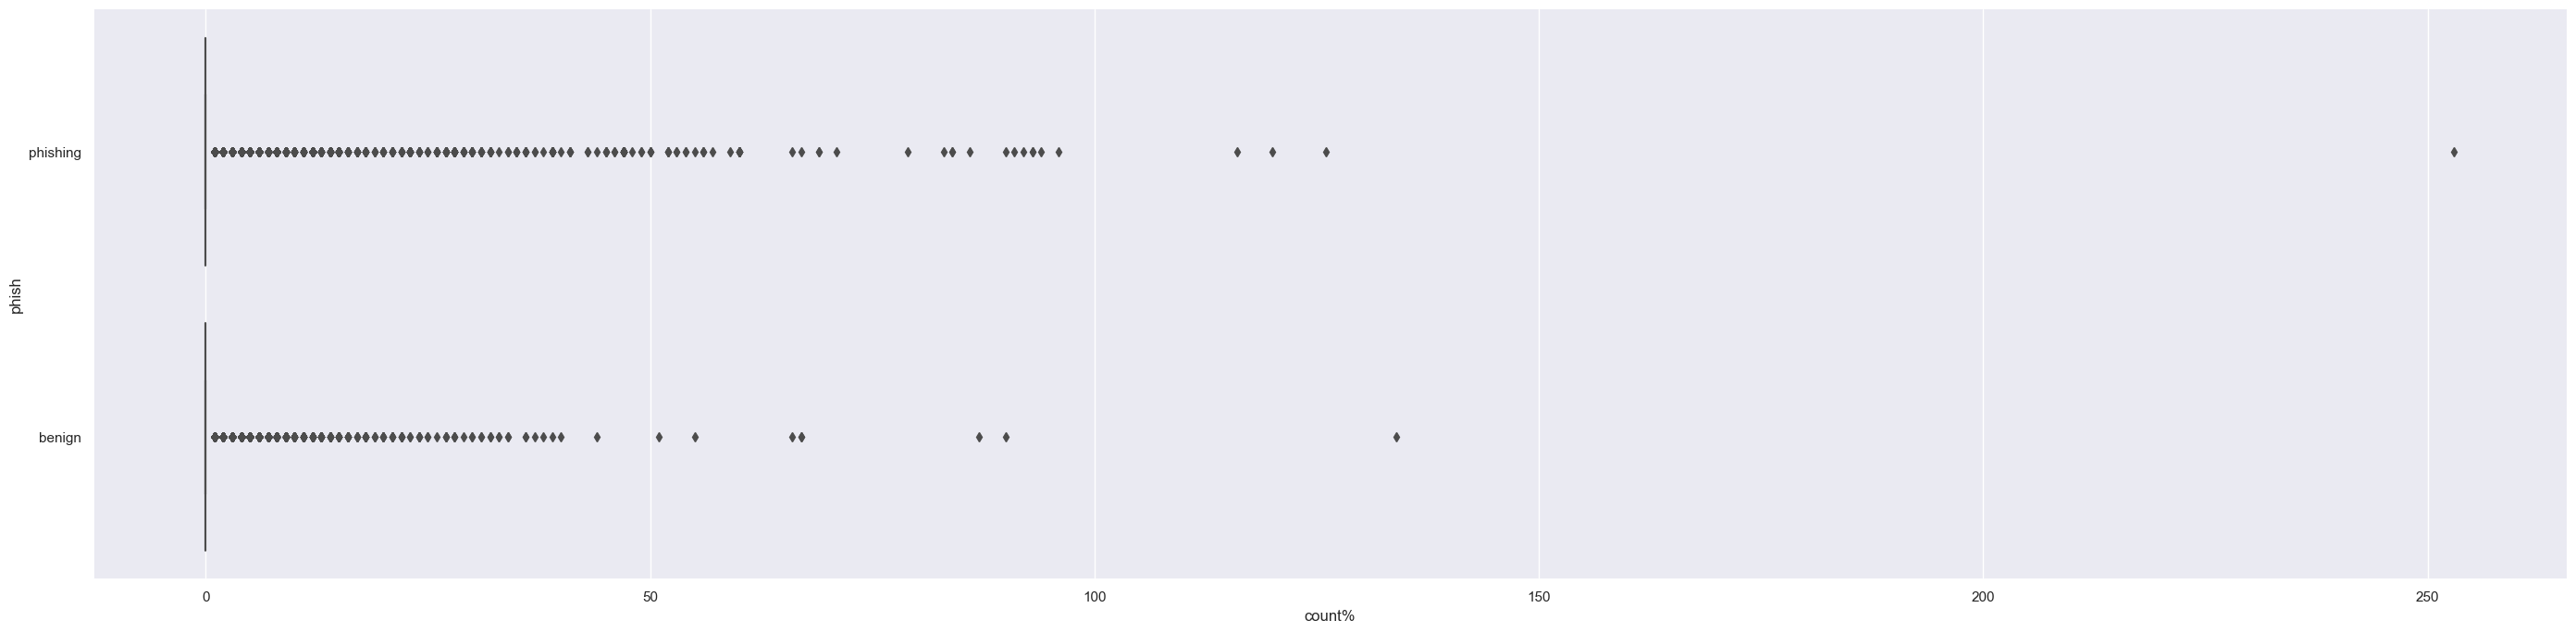

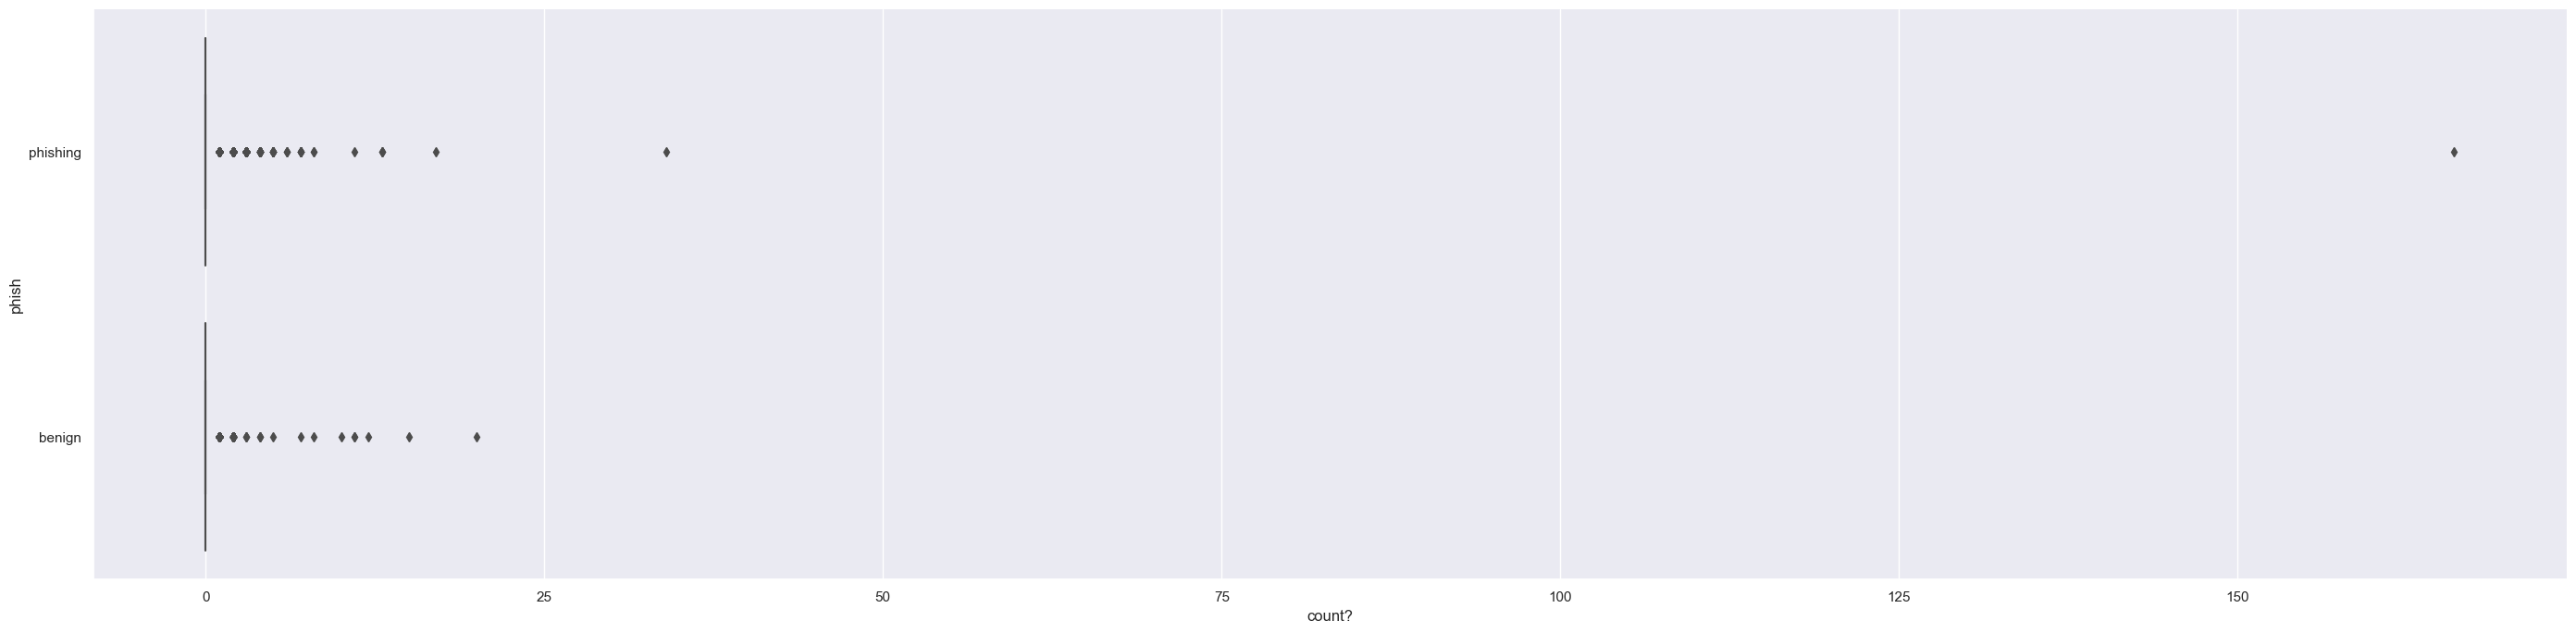

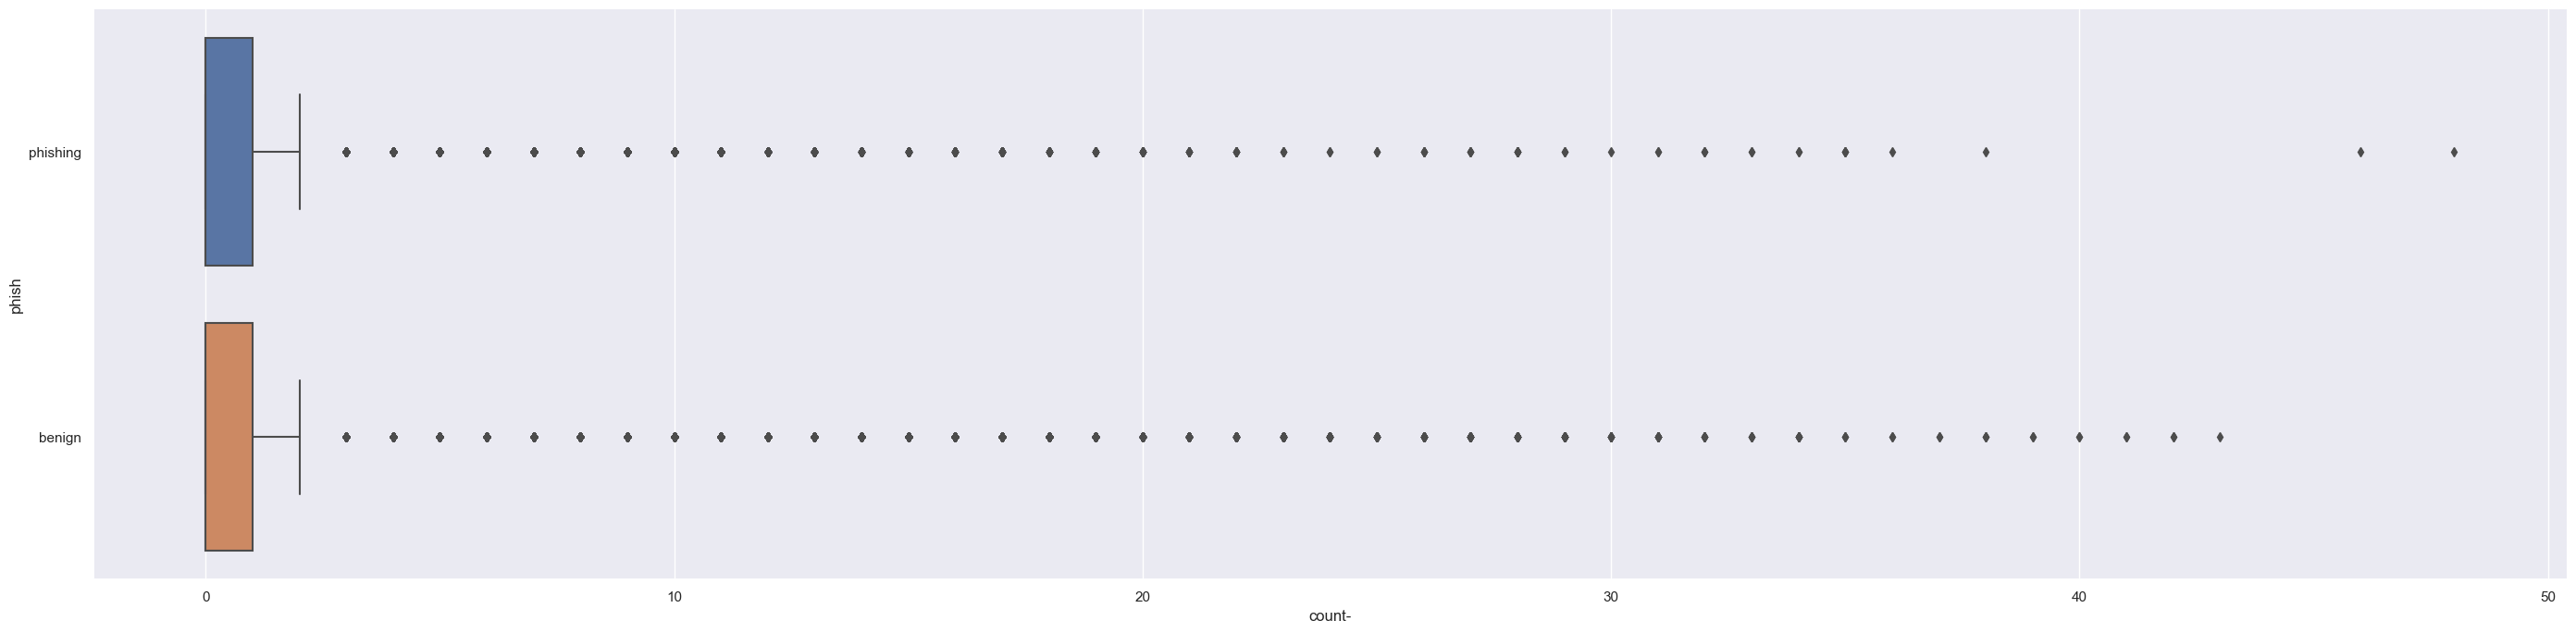

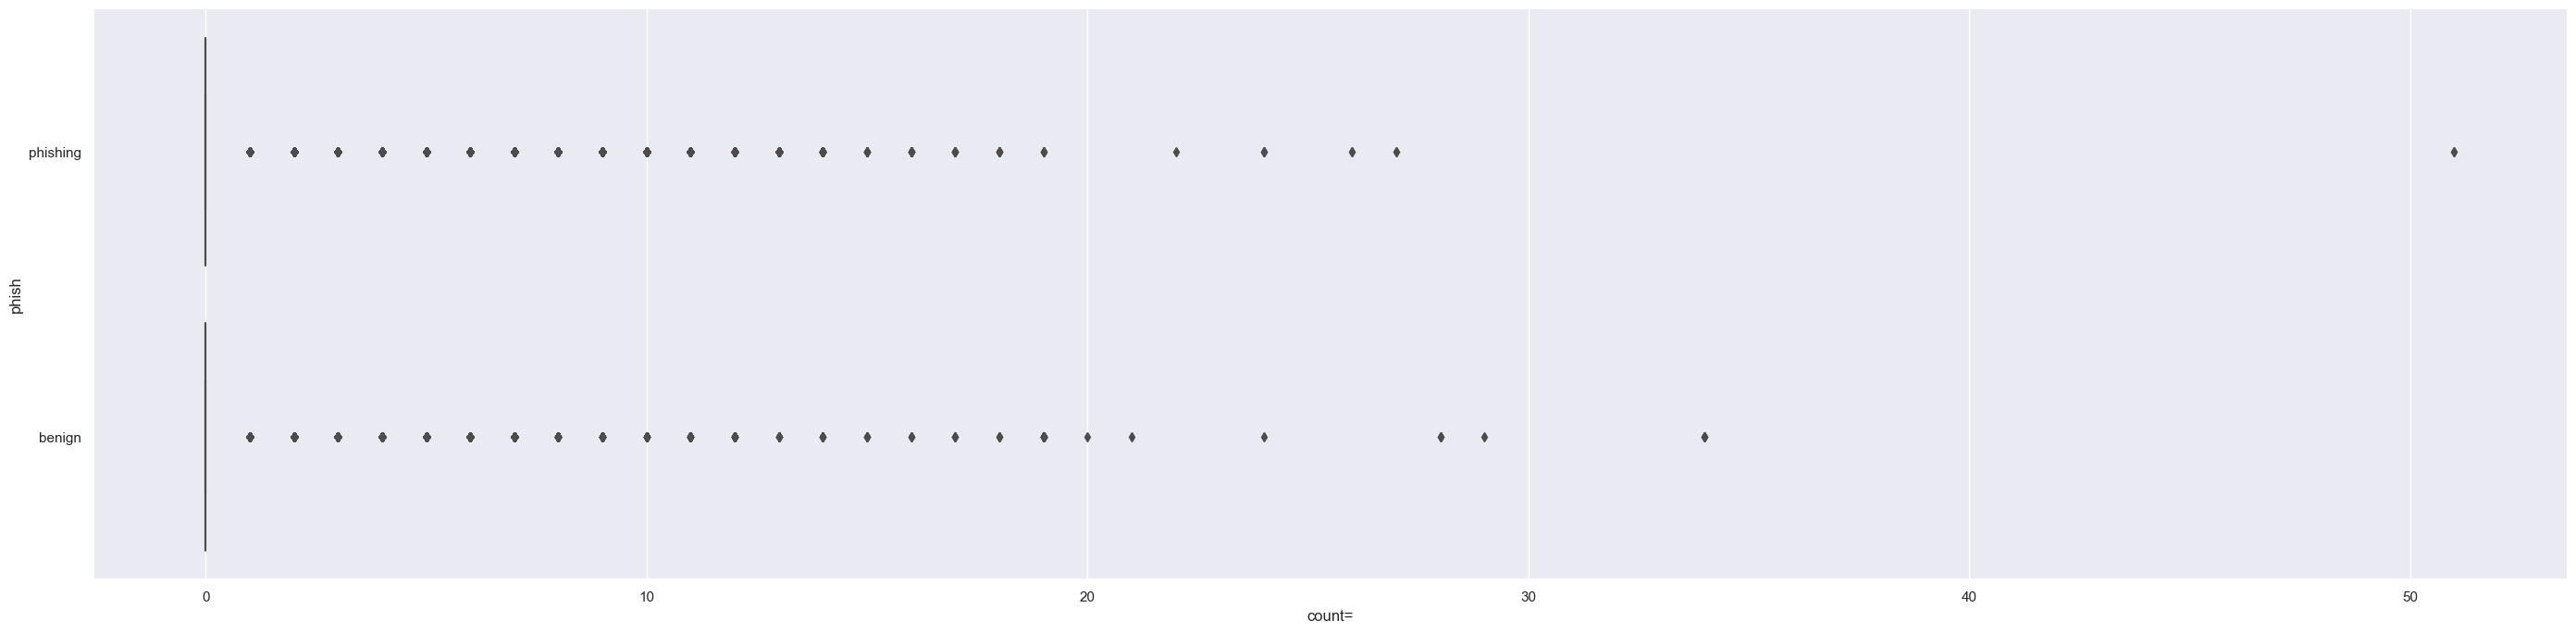

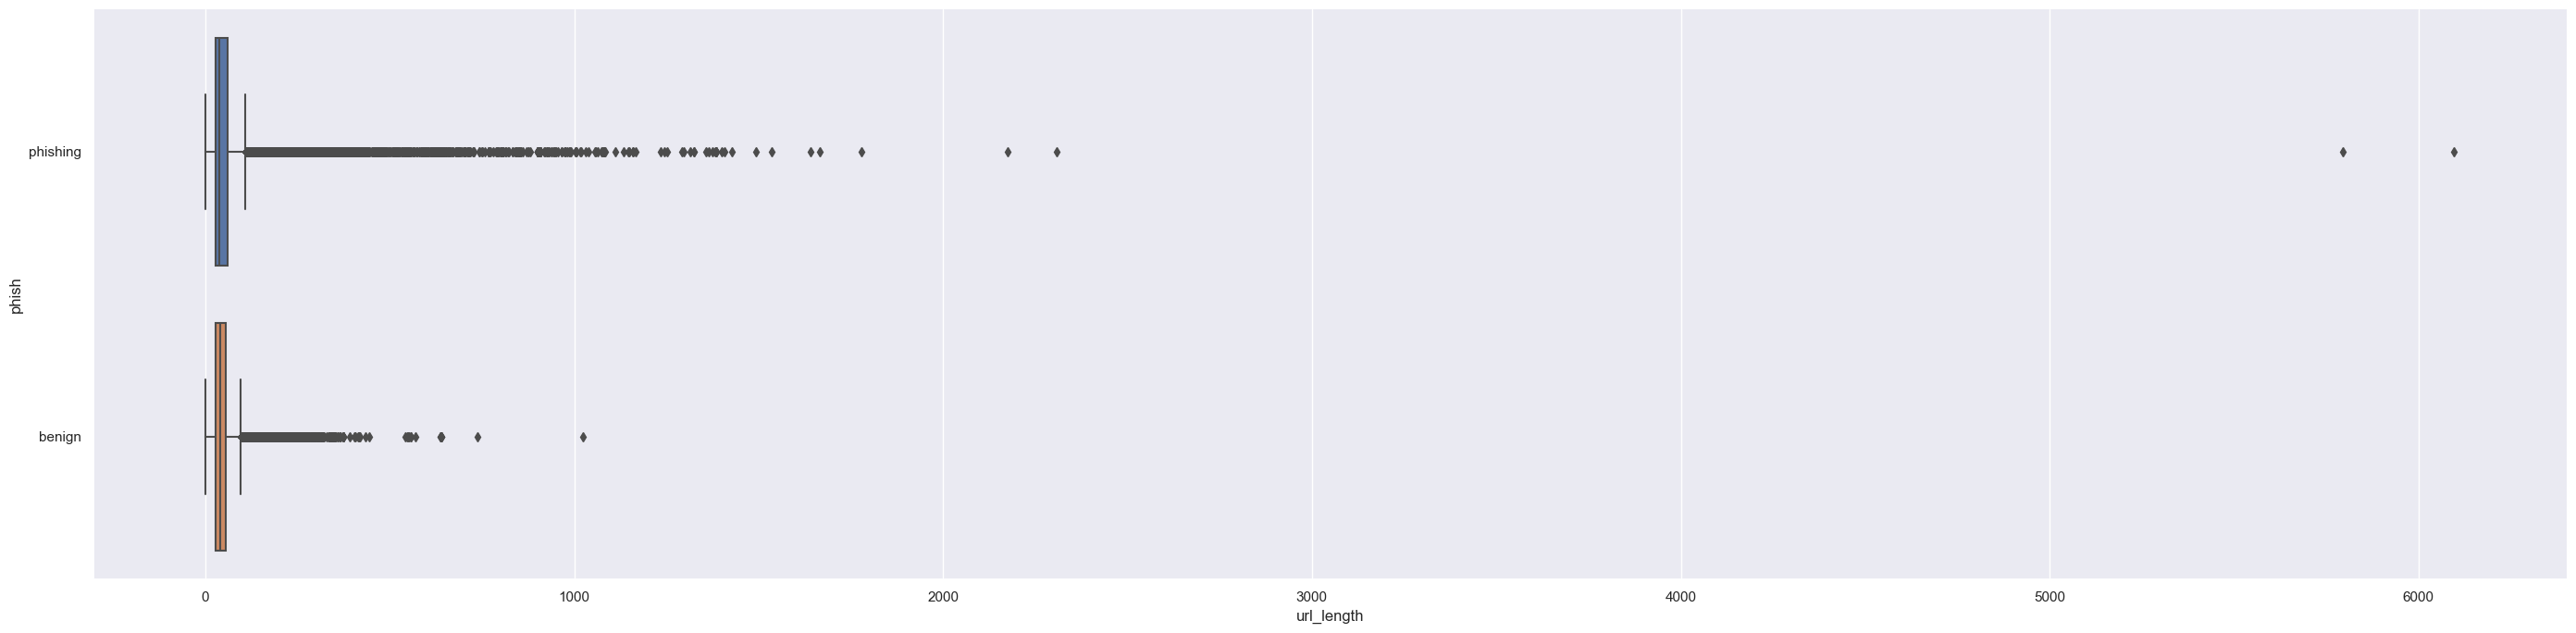

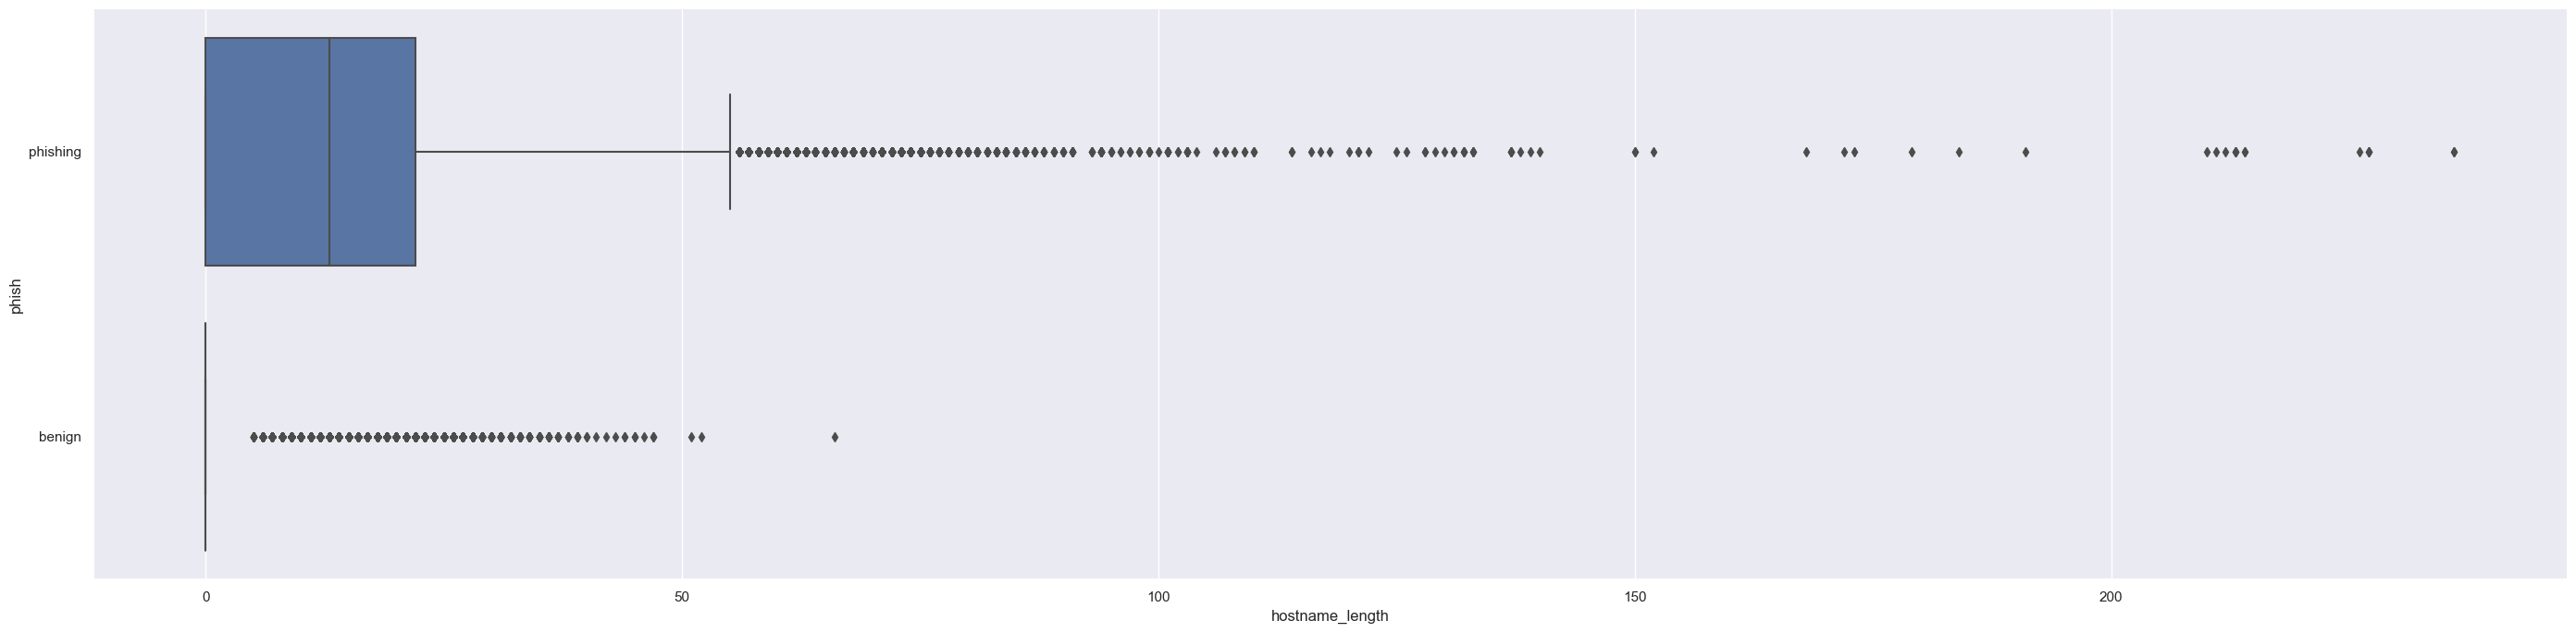

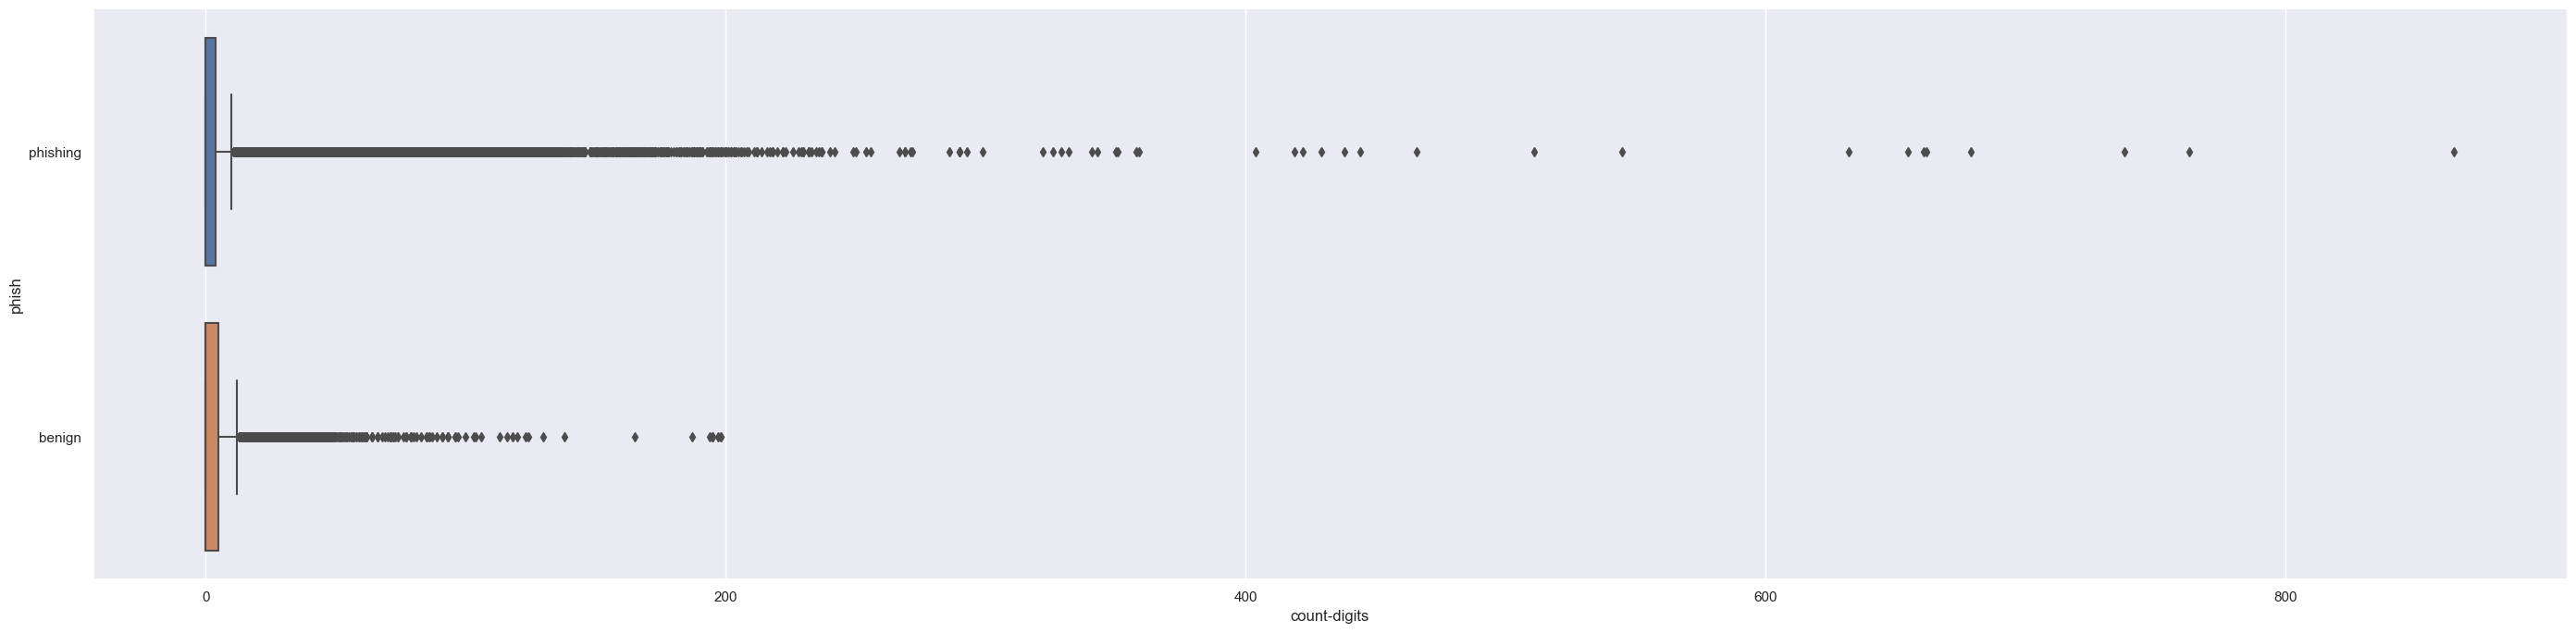

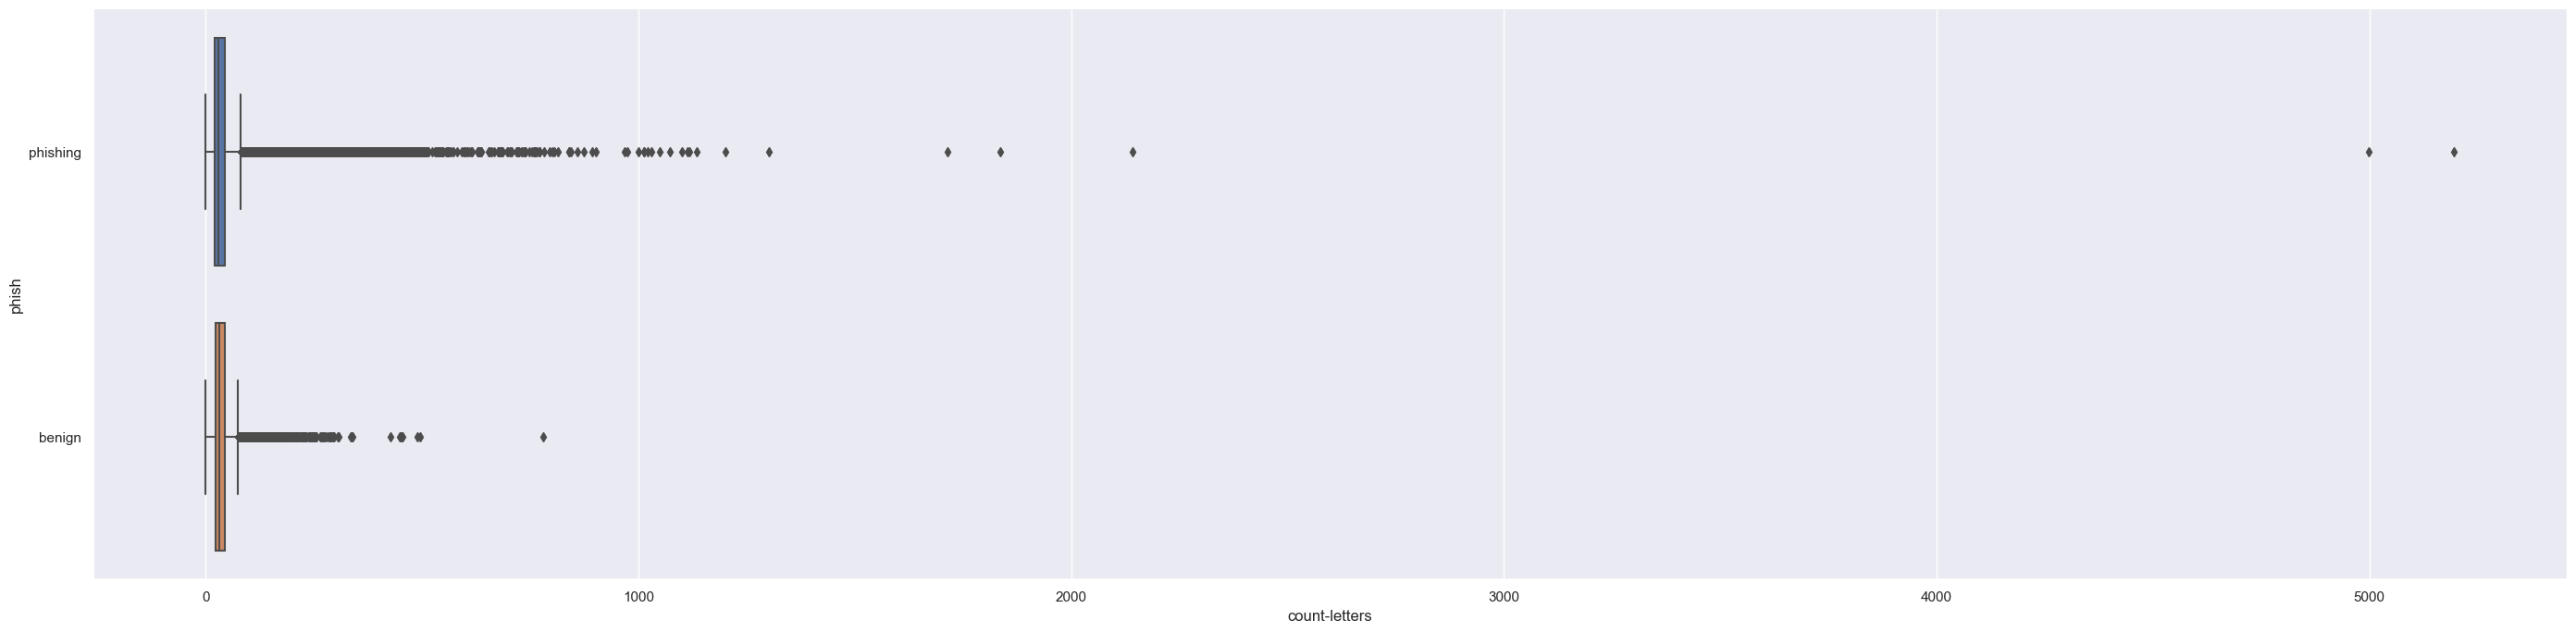

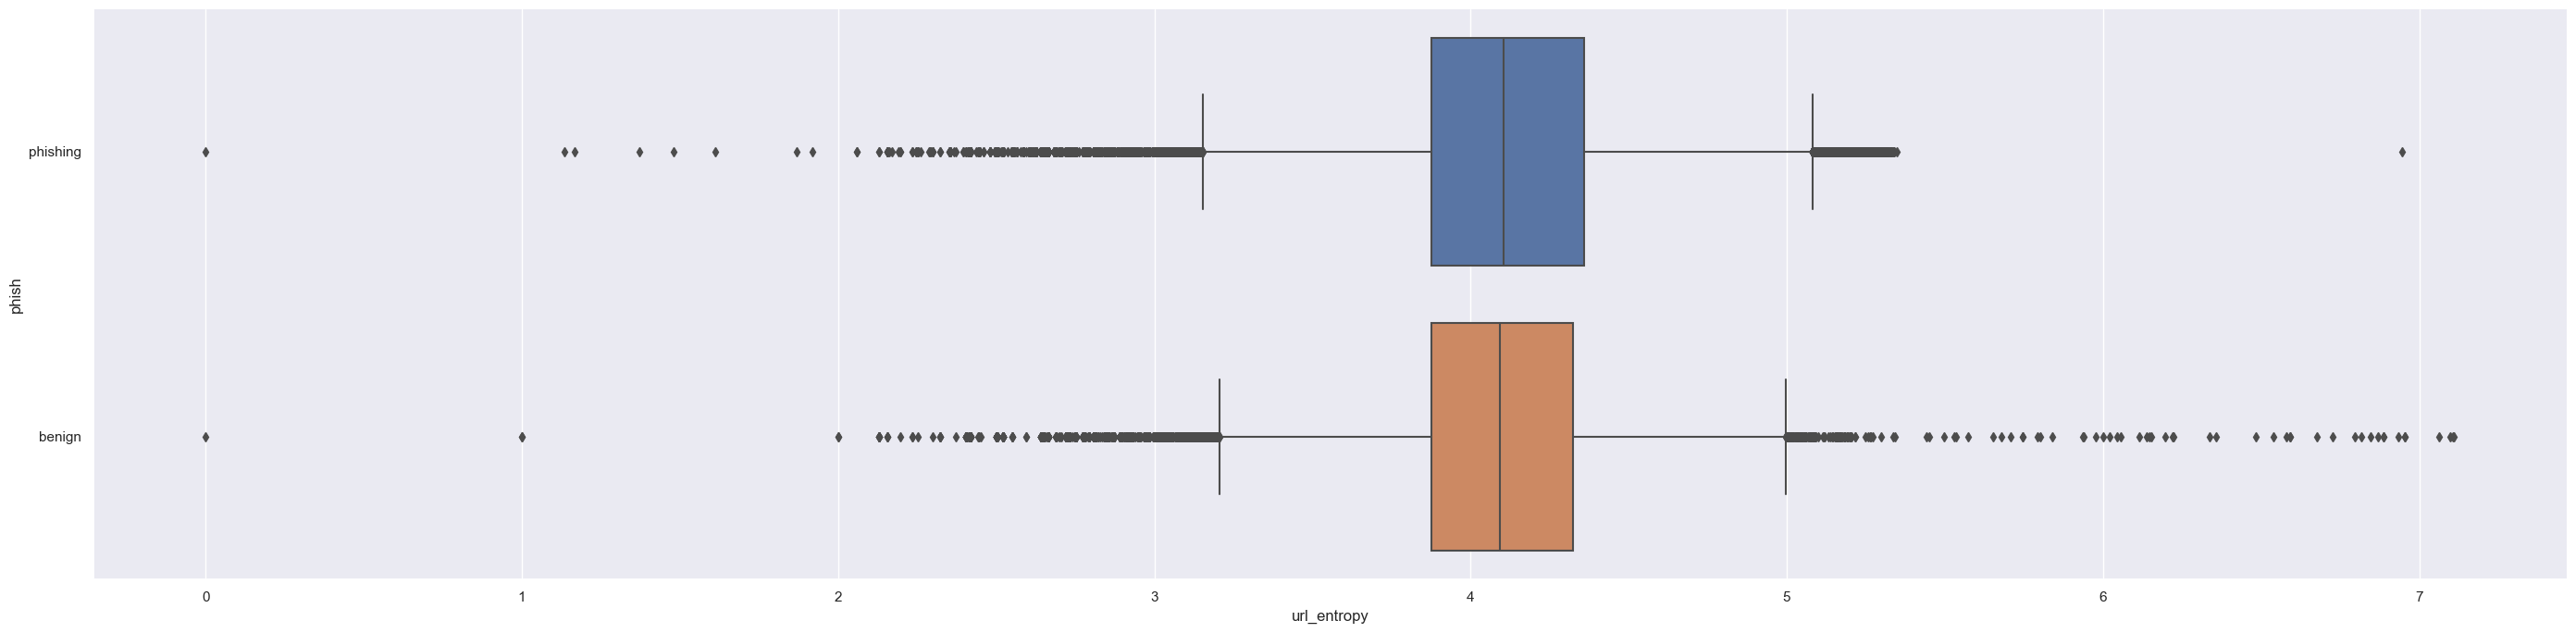

In [9]:
for var in numbers:
    sb.catplot(x=var, y='phish', kind='box',orient='h',height=7, aspect=4, data=df)

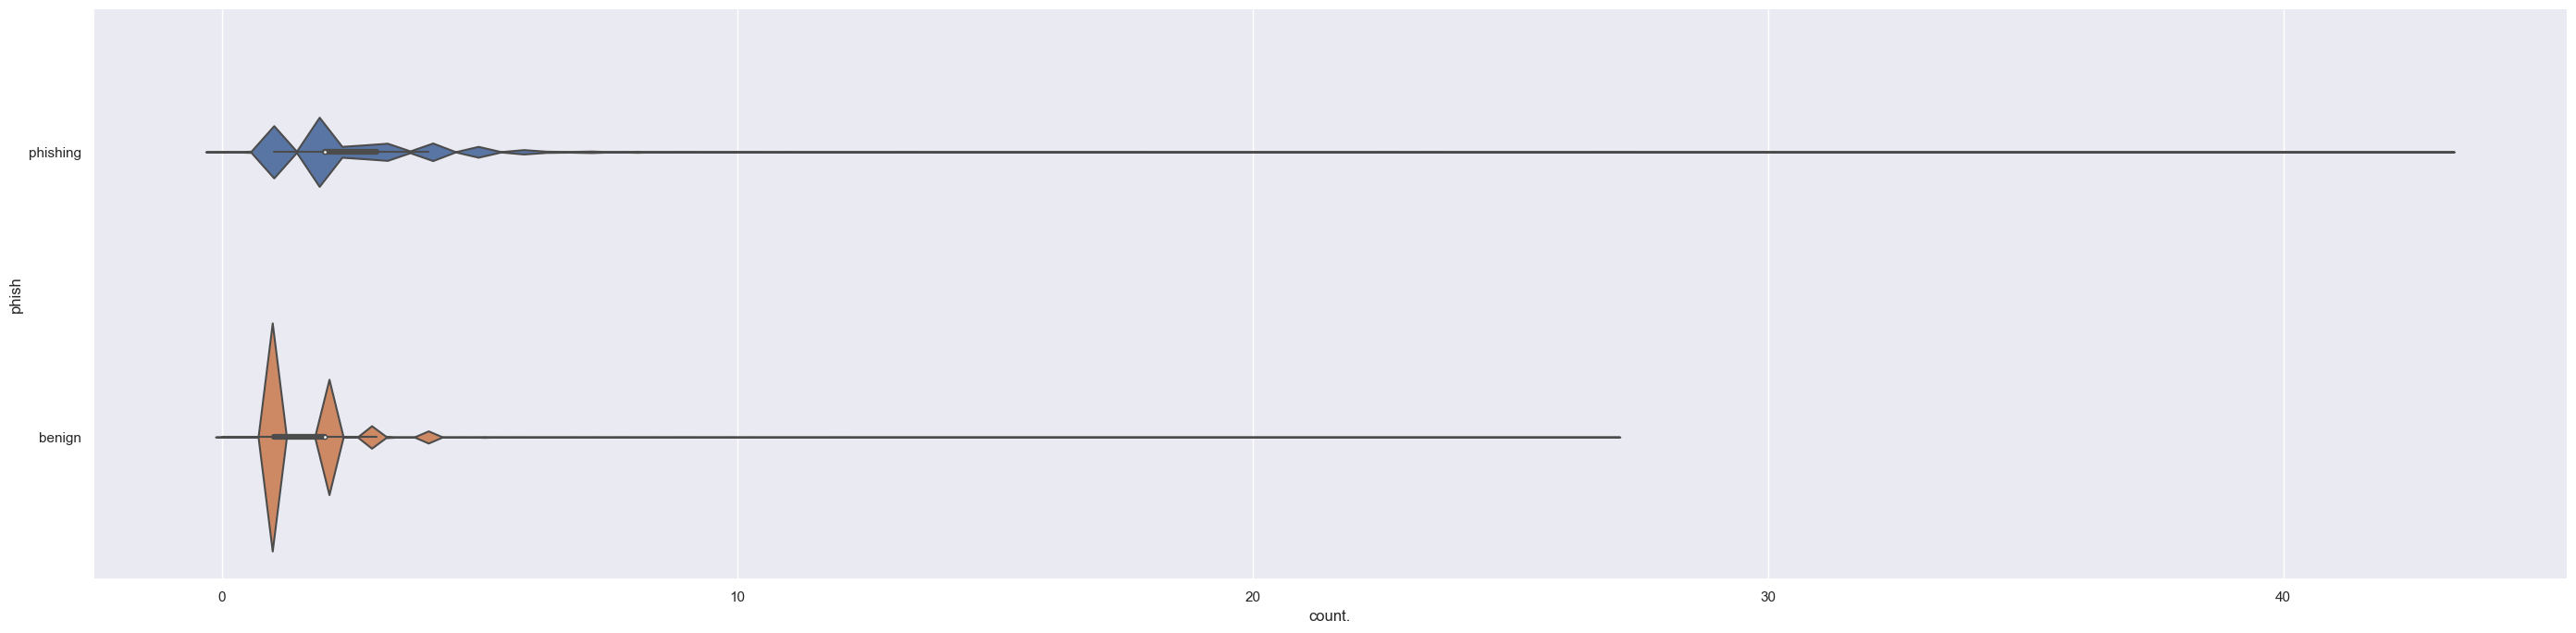

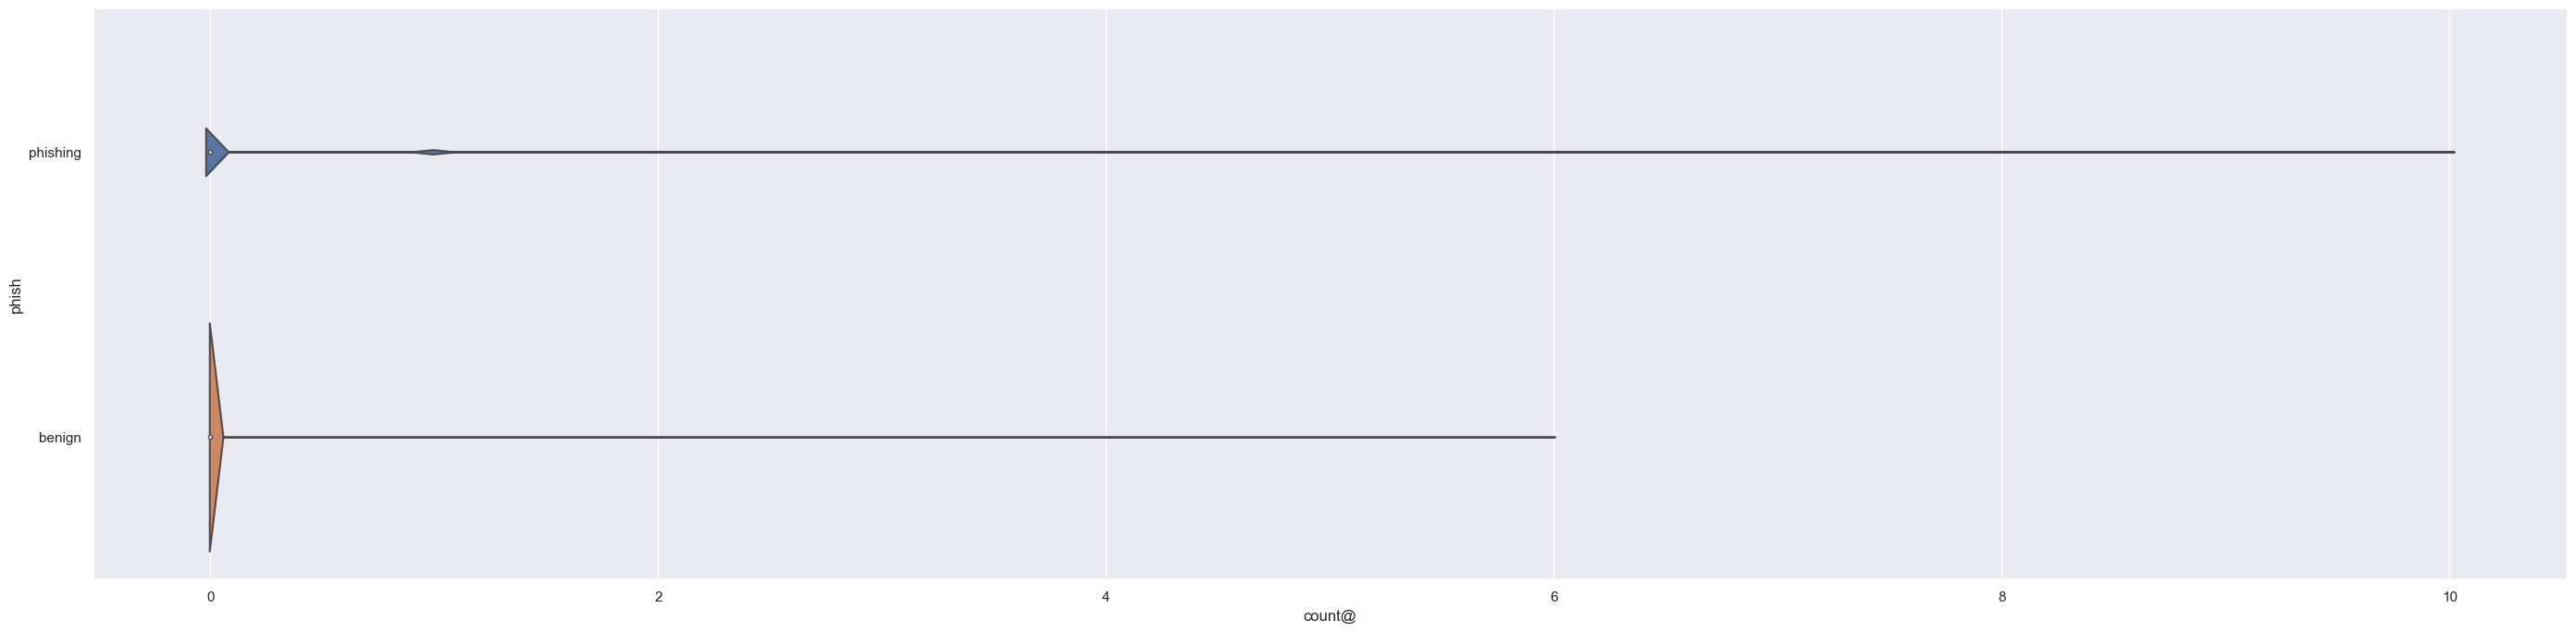

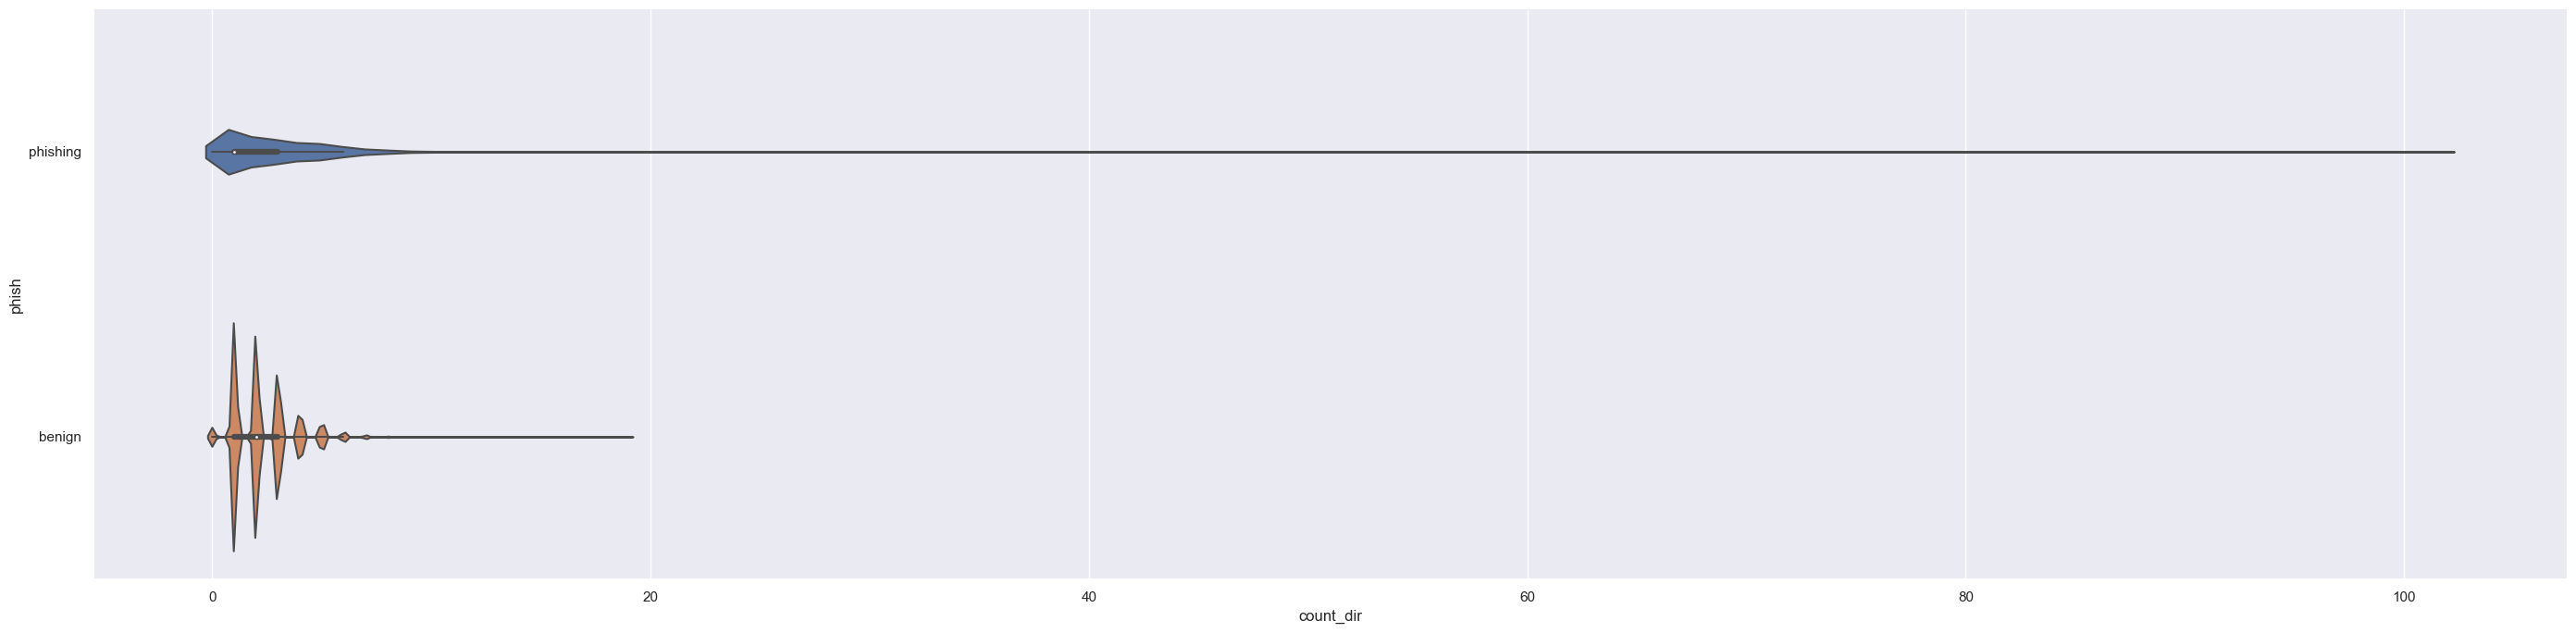

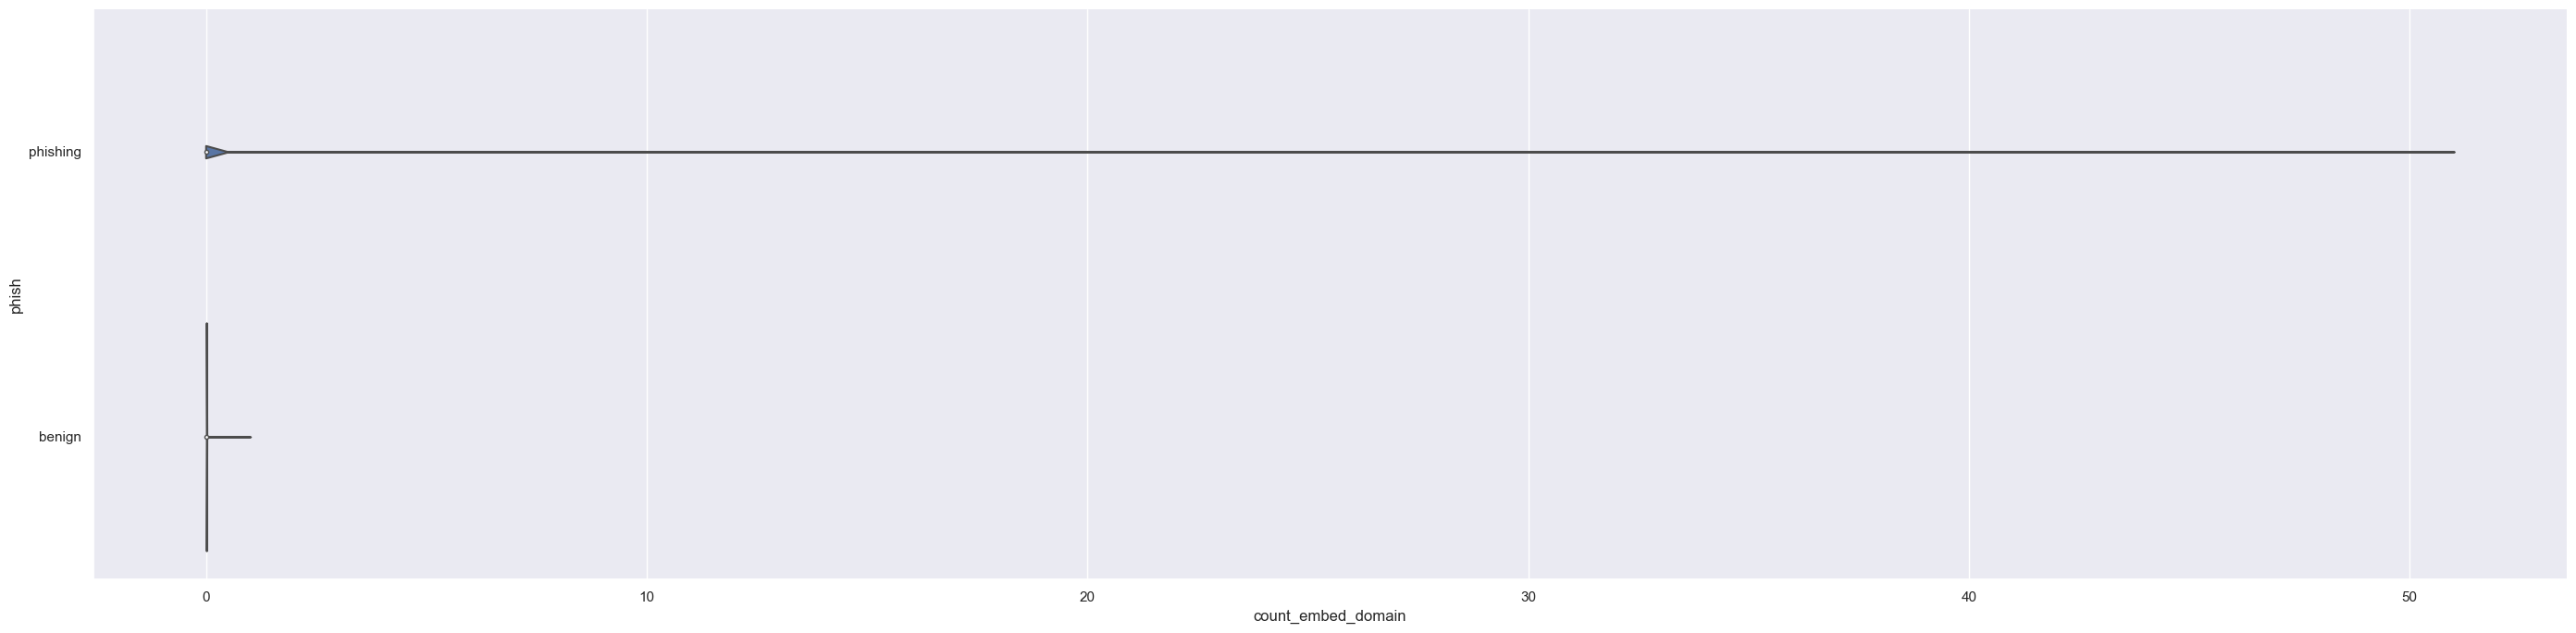

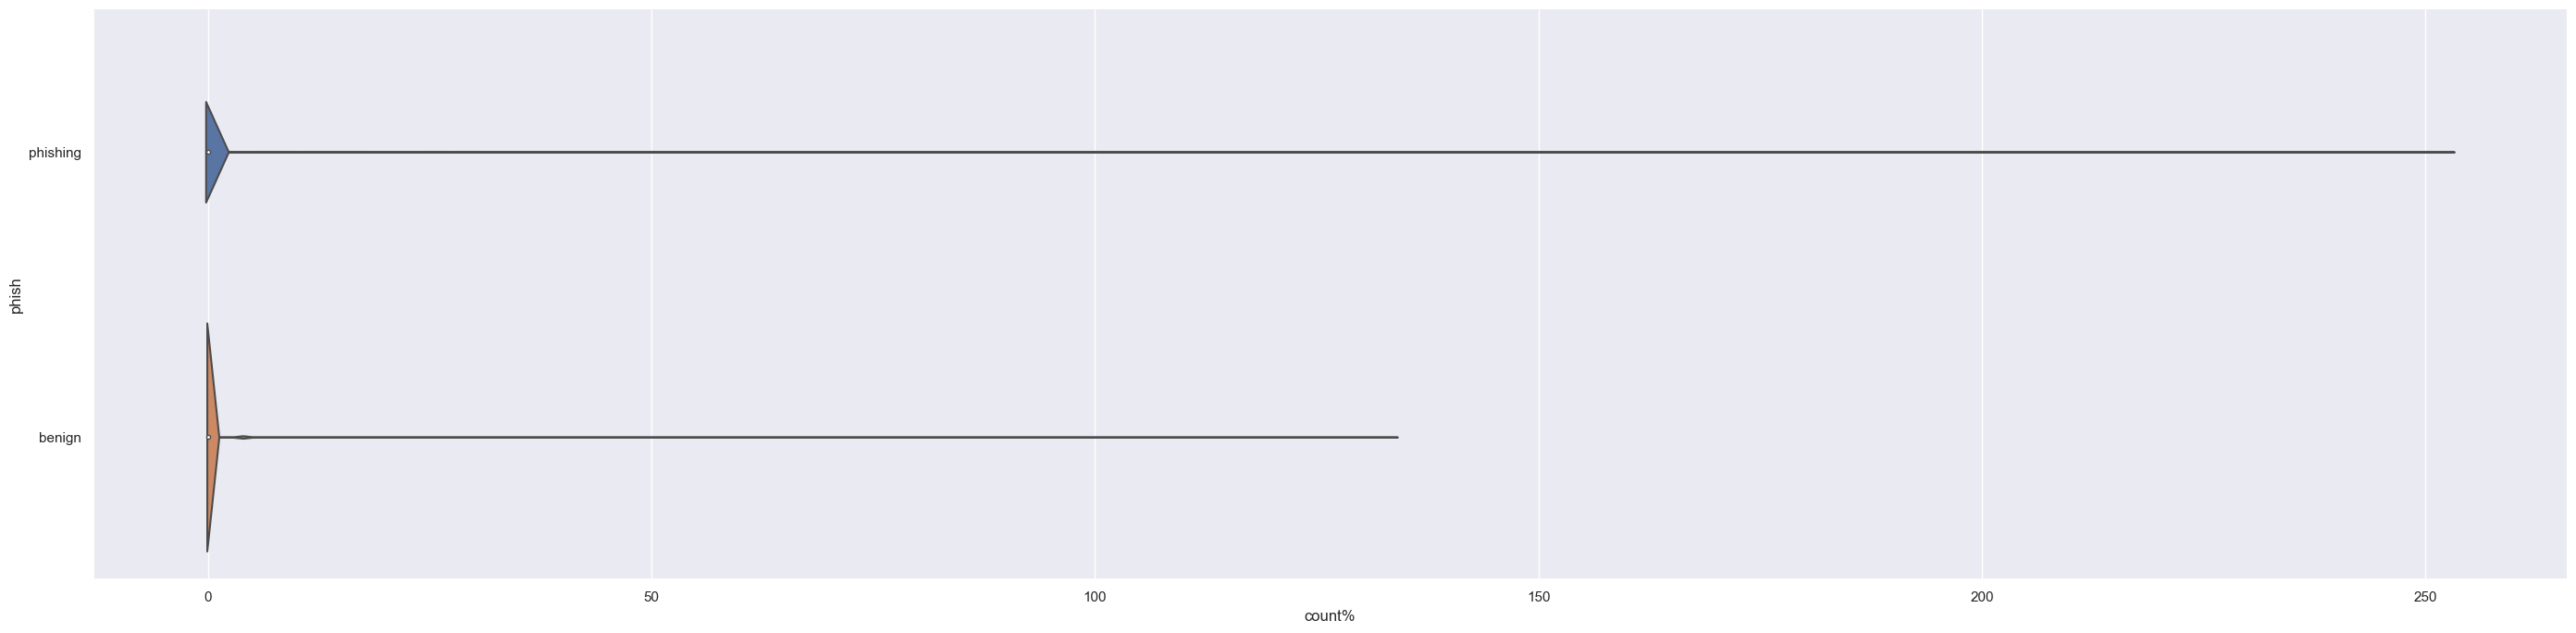

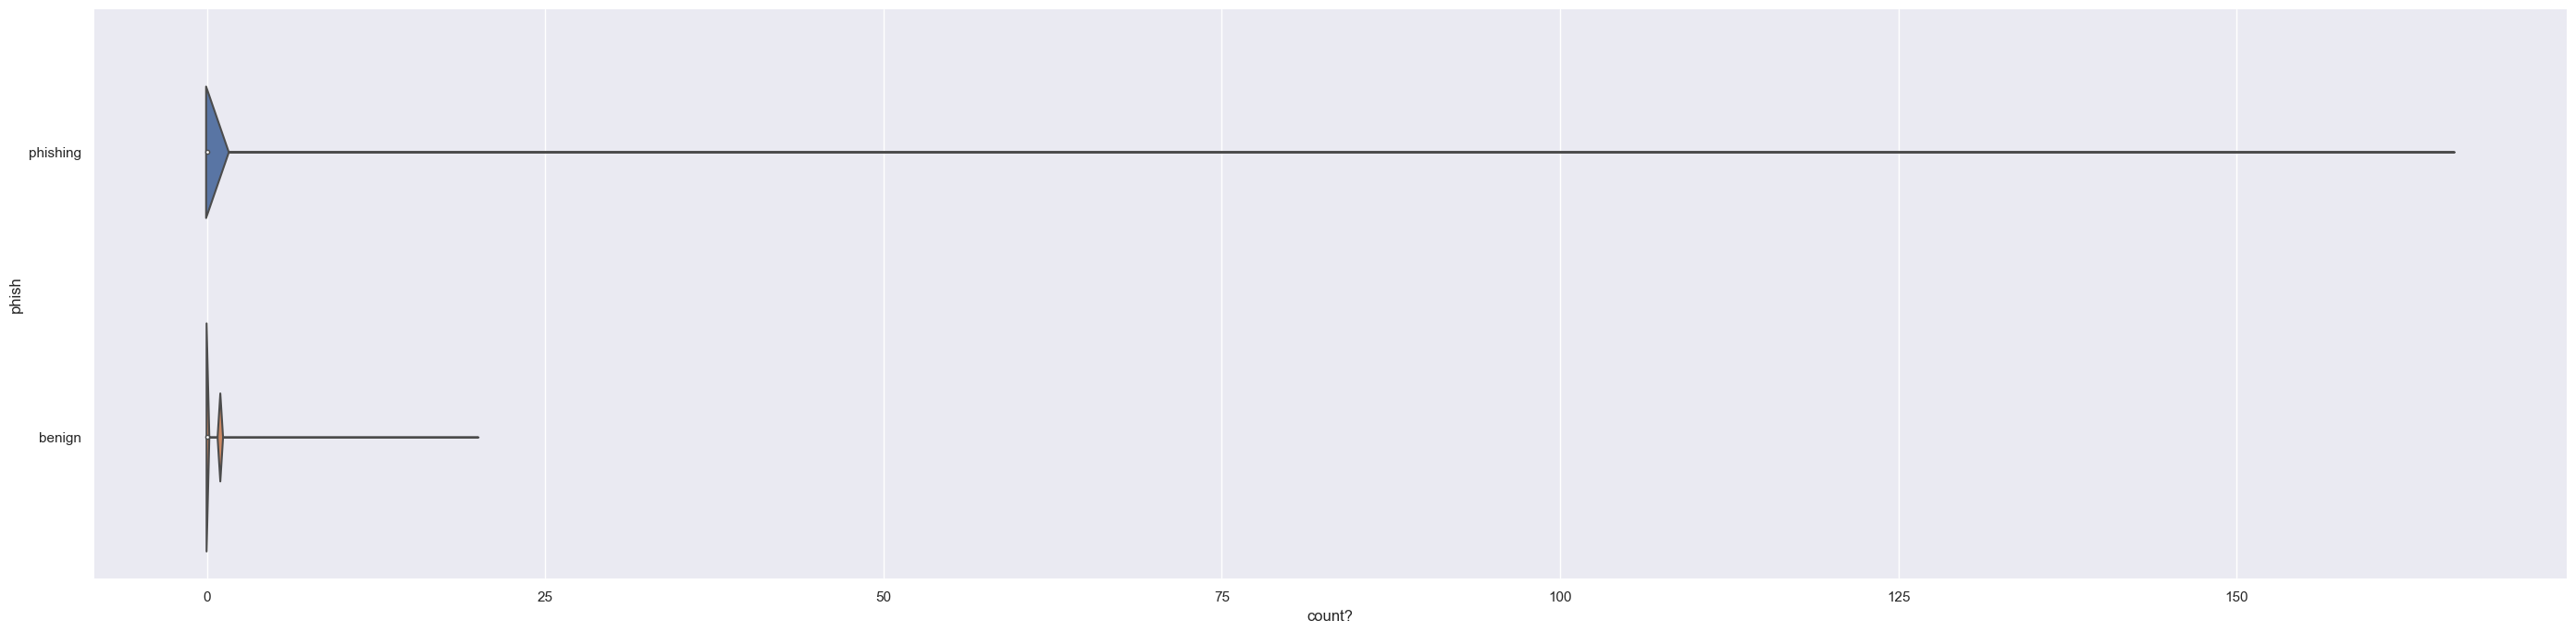

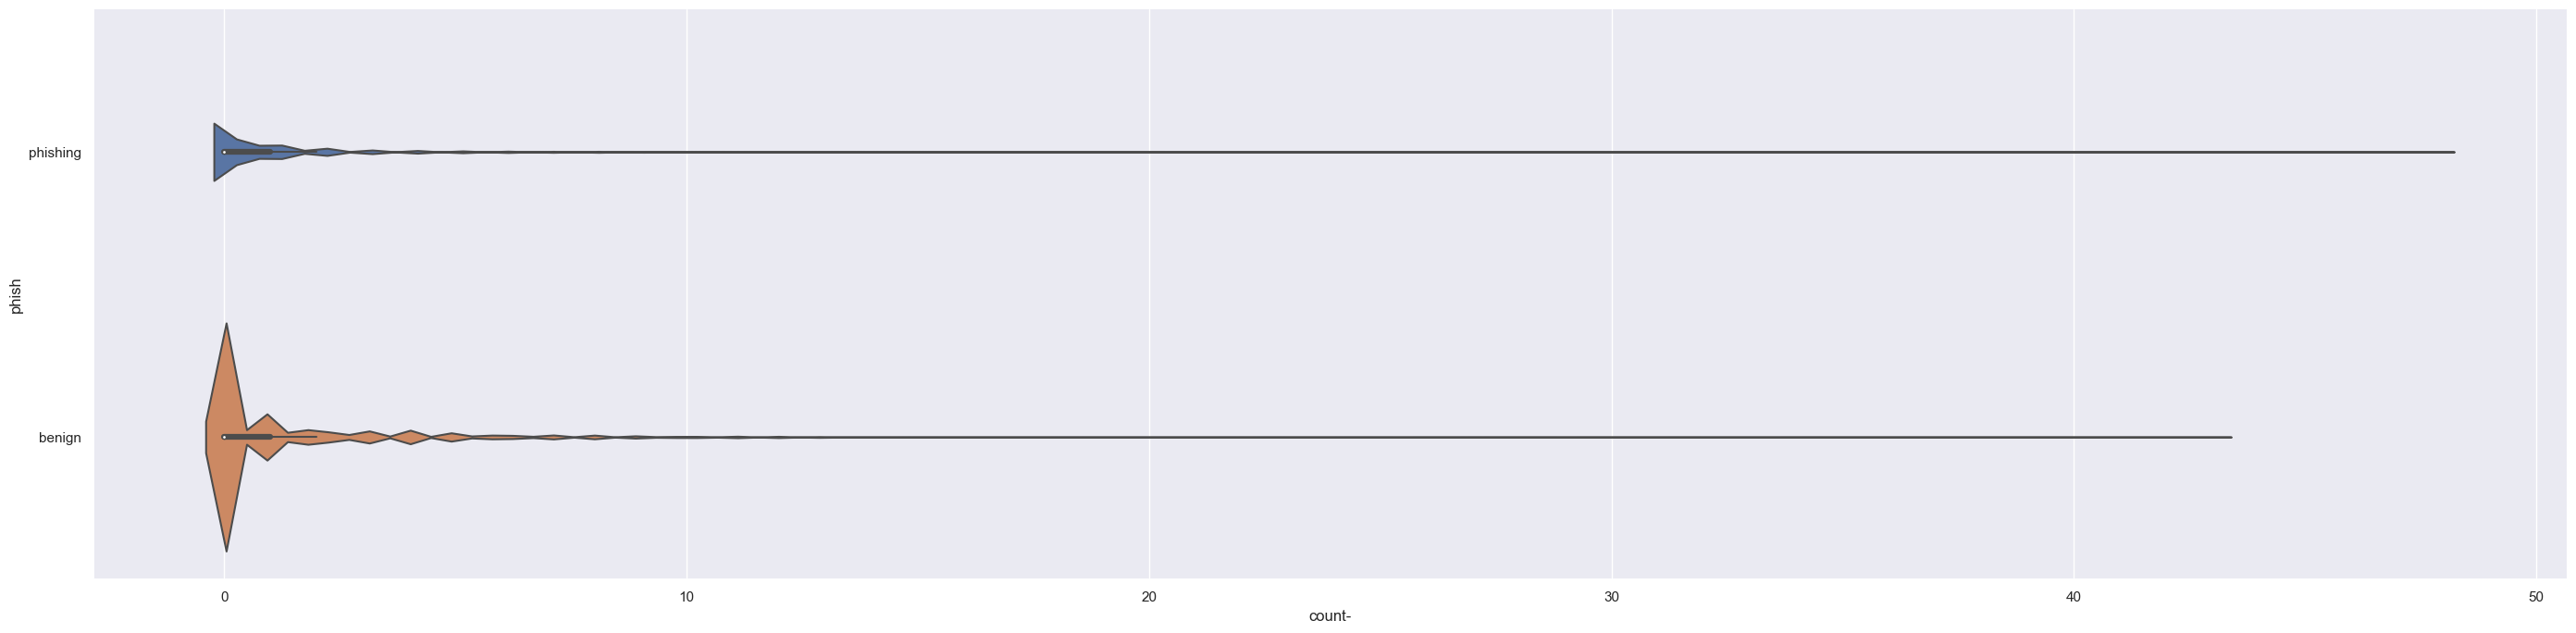

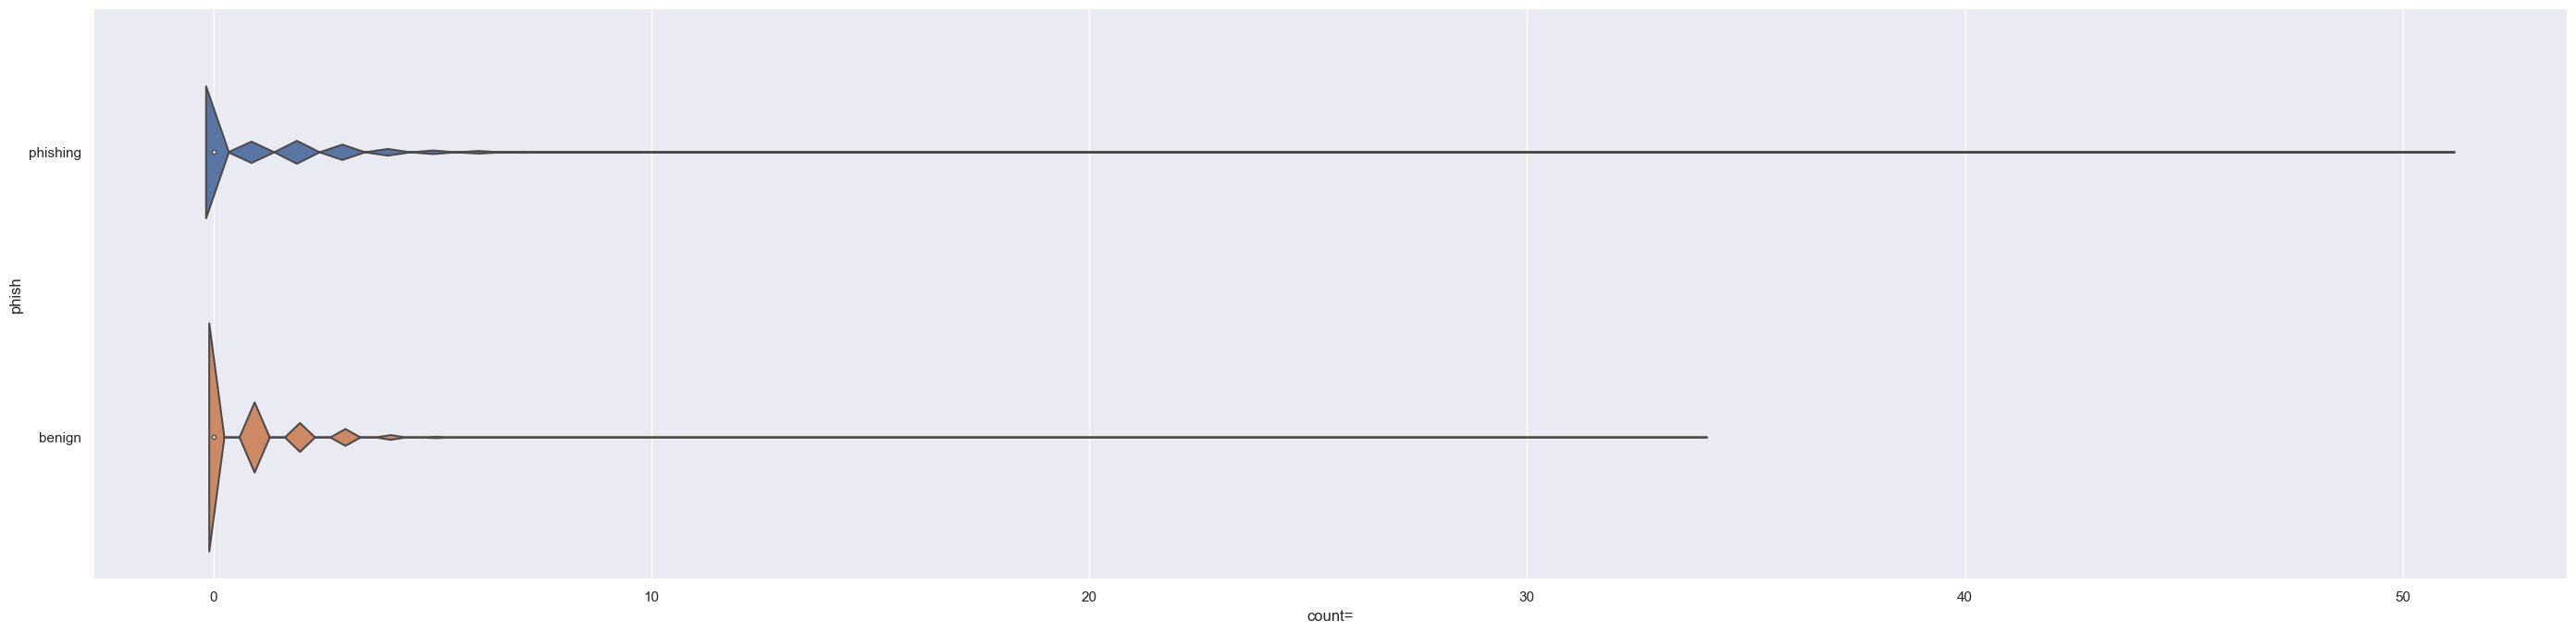

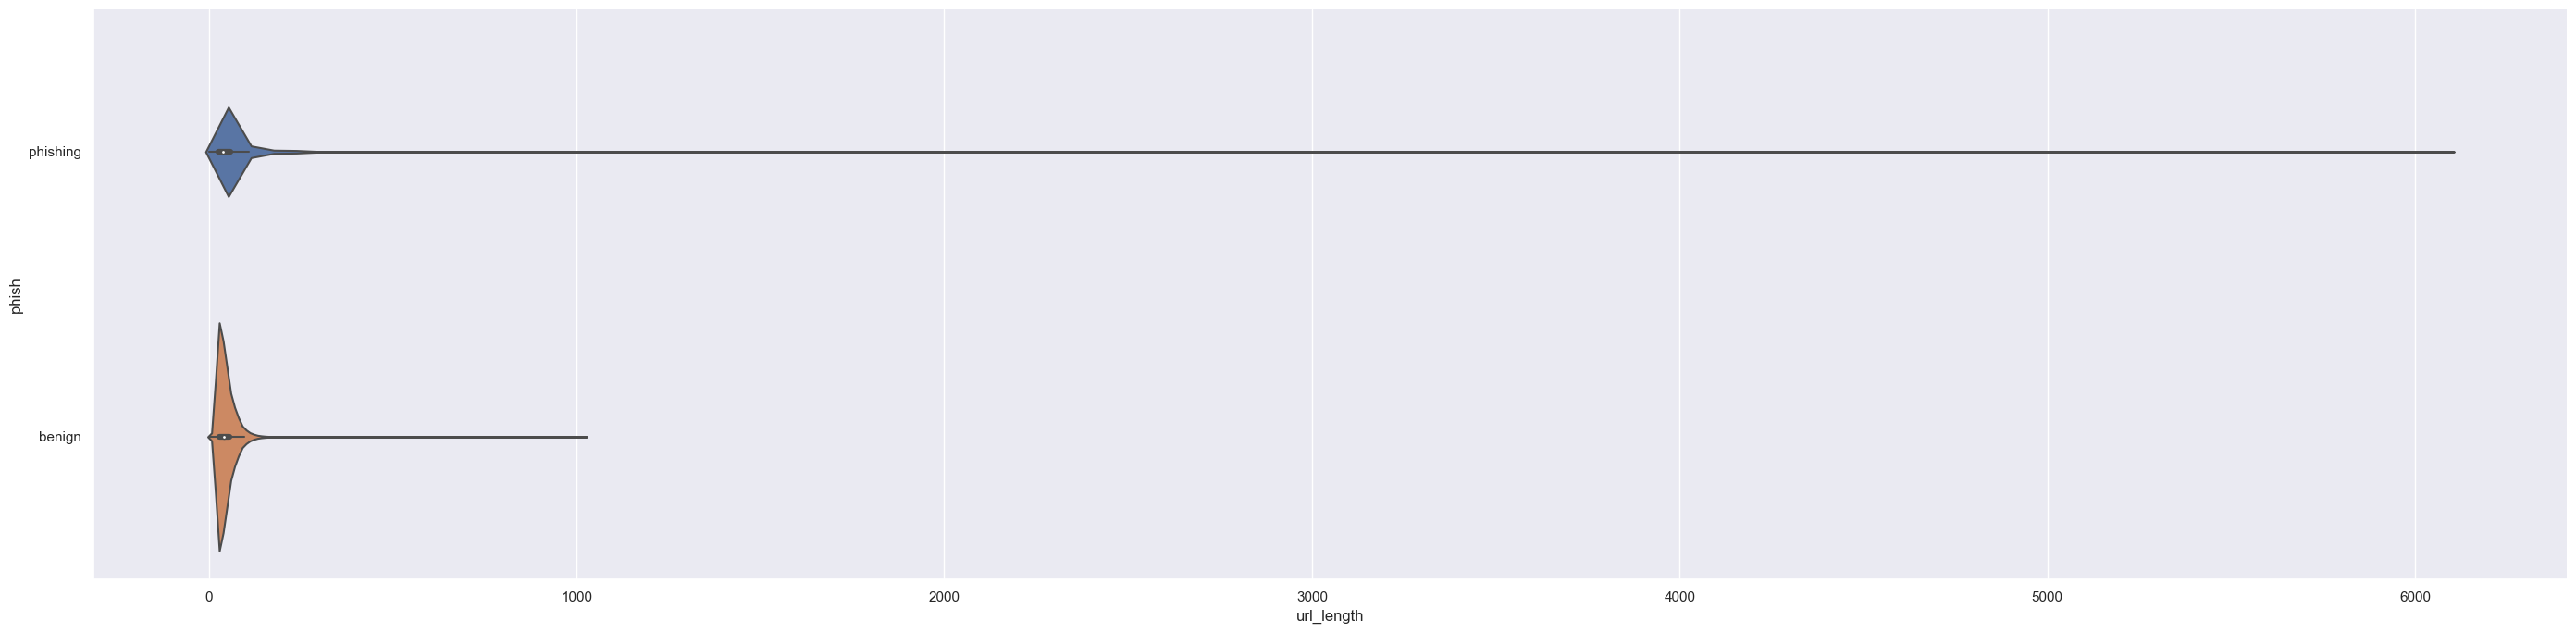

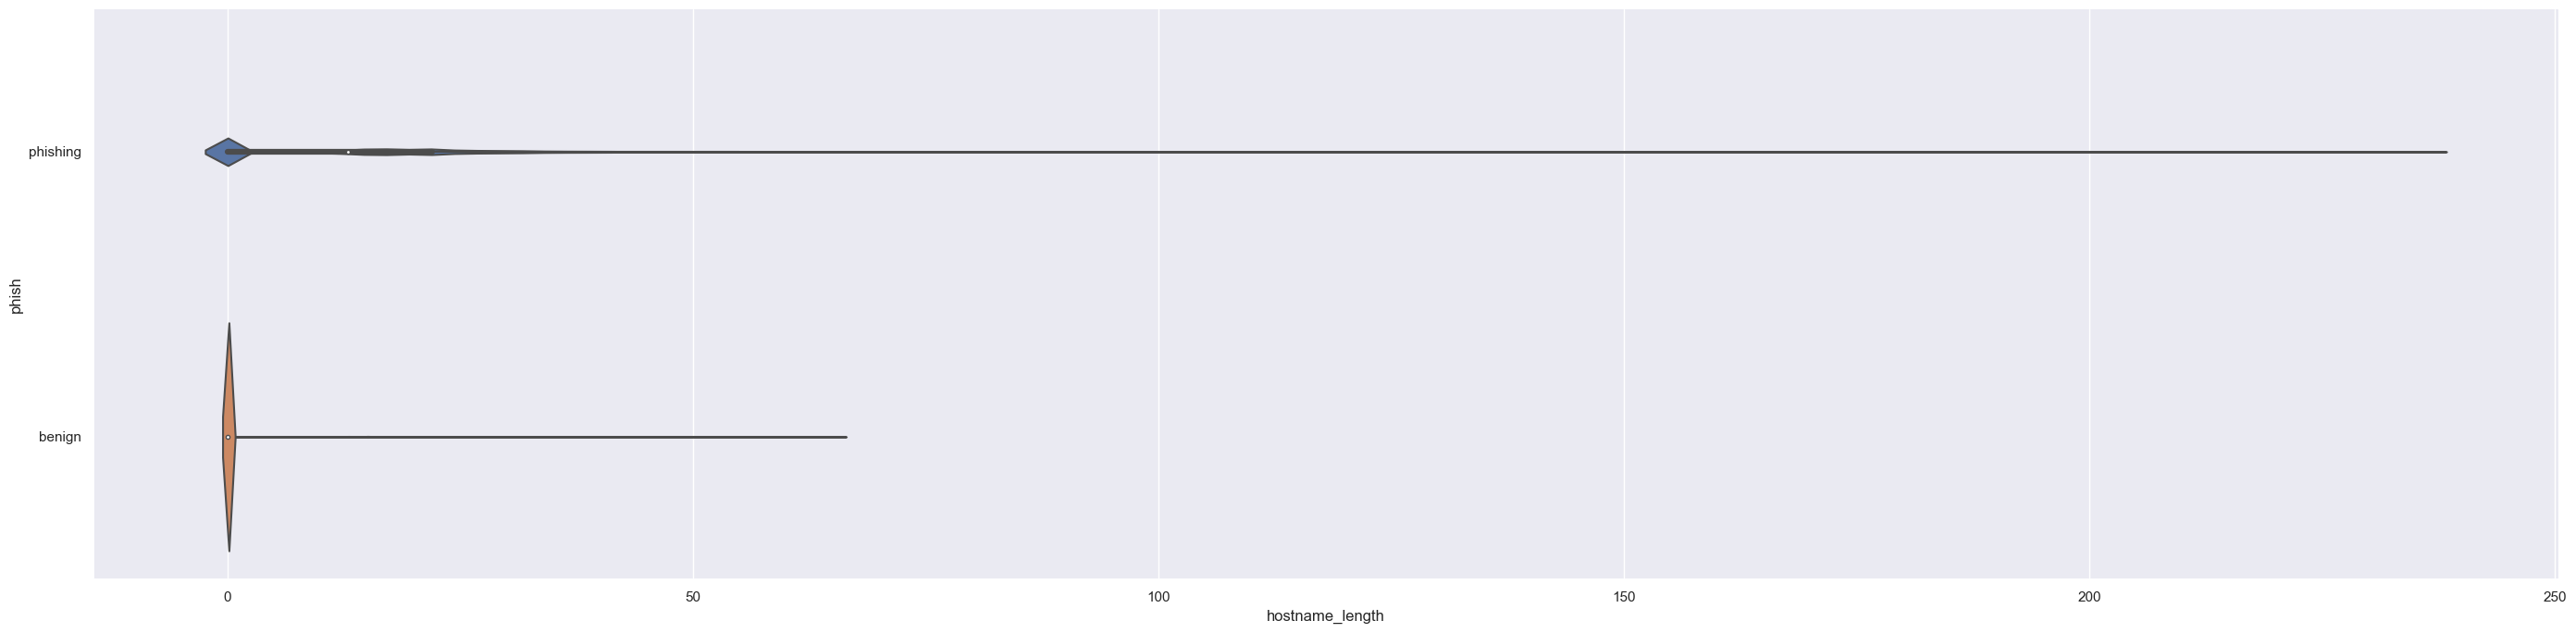

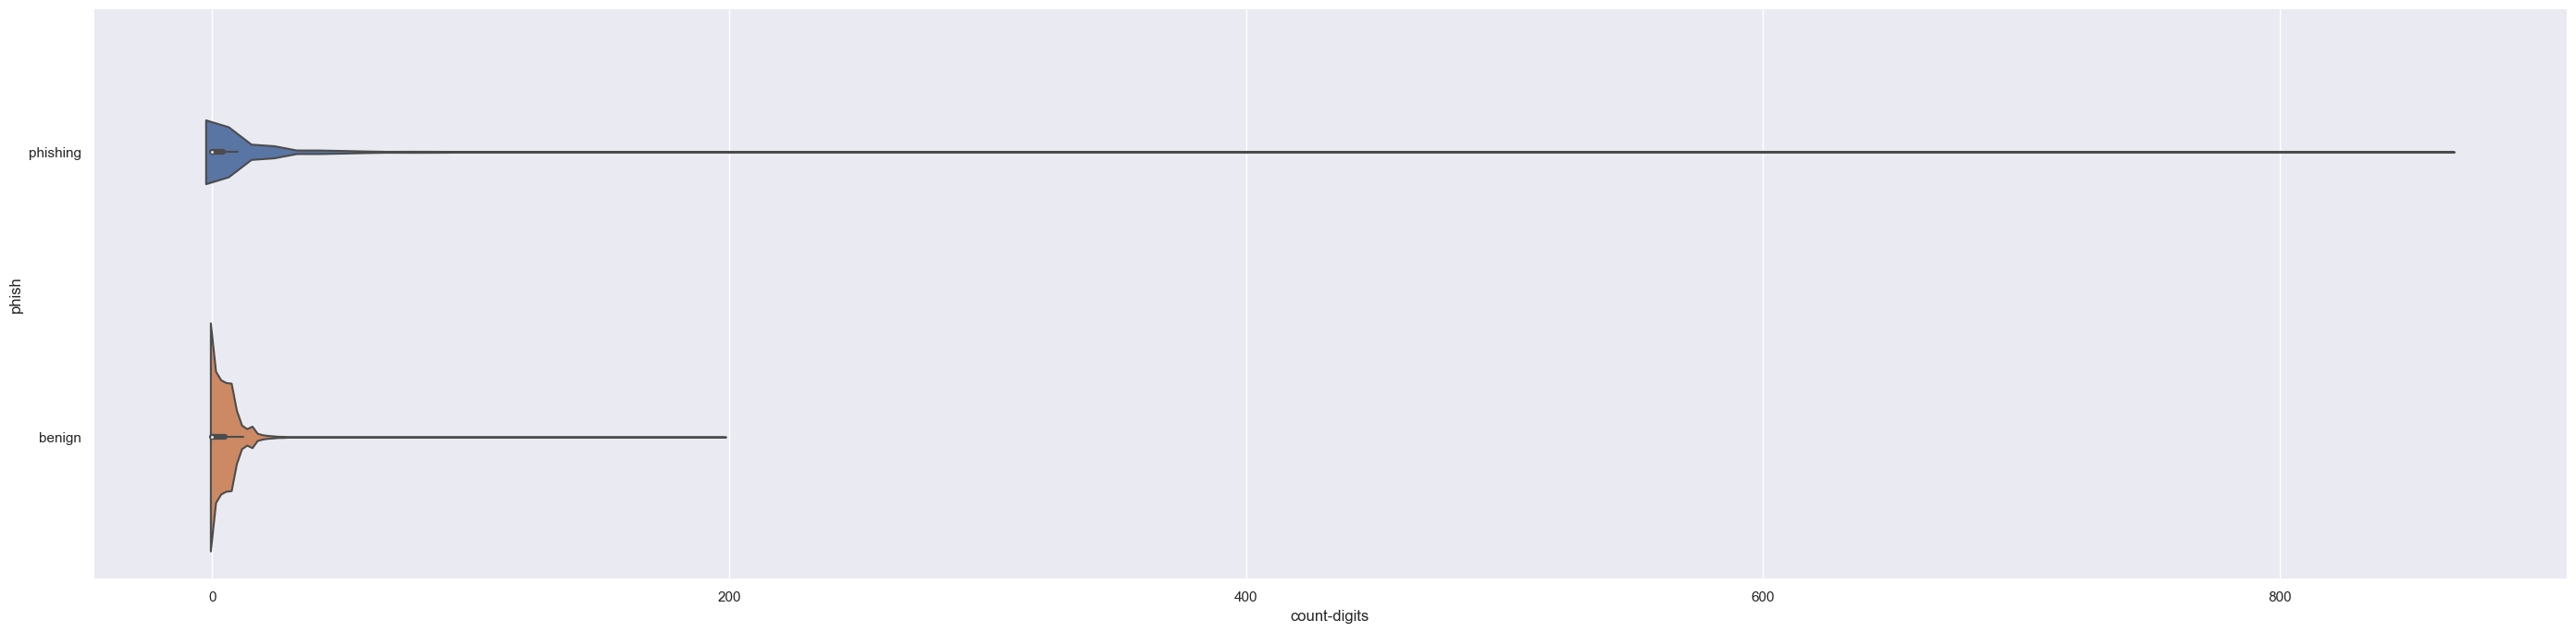

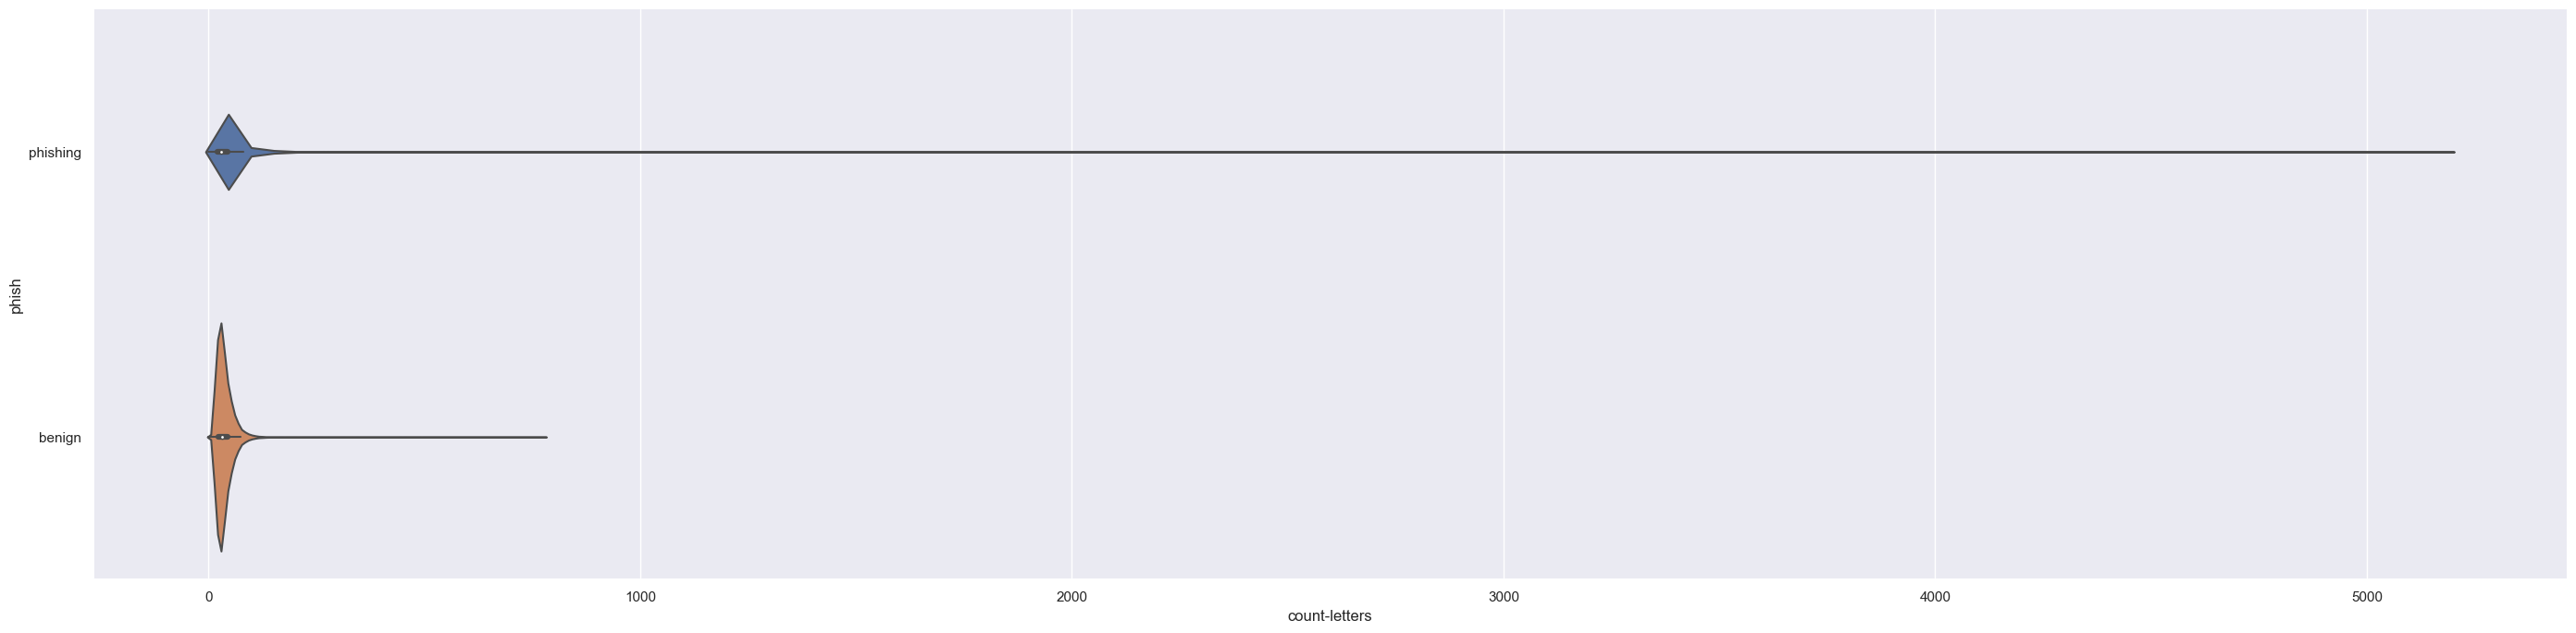

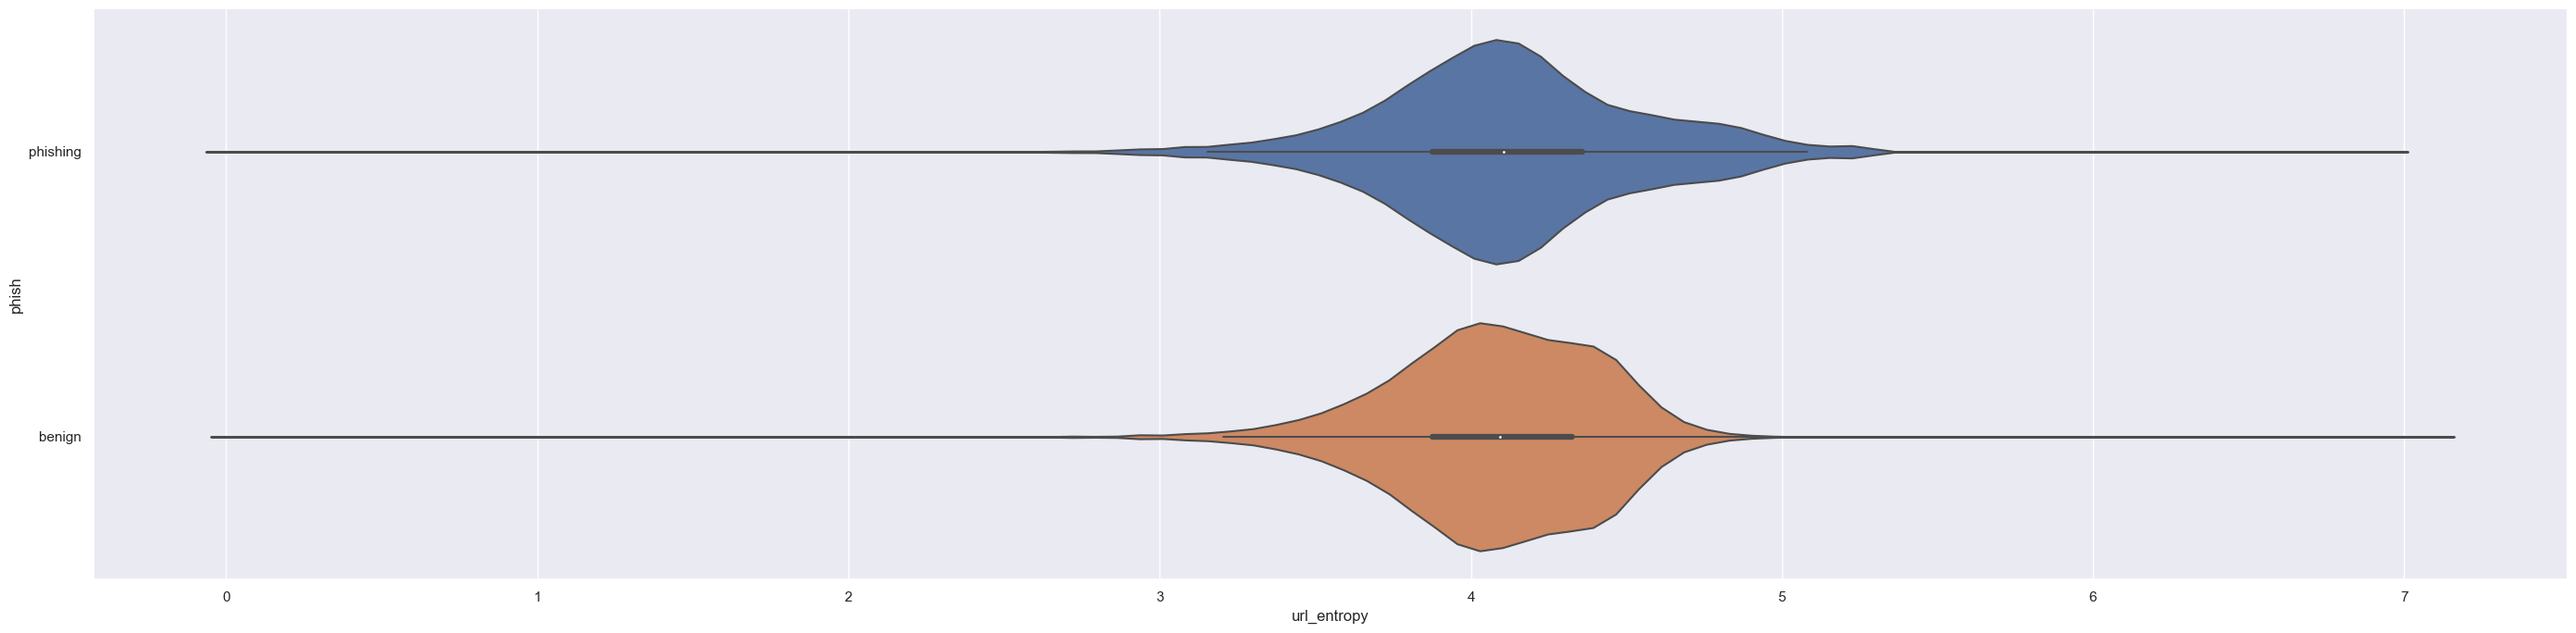

In [10]:
for var in numbers:
    sb.catplot(x=var, y='phish', kind='violin',orient='h',height=7, aspect=4, data=df)

### 5. Numerical Variables Analysis
From the boxplots and violinplots, it can be observed that most of the variables are skewed heavily to the left, with the exception of `url_entropy`. A large number of outliers can be observed for many of the variables as well, this combined with the entropy of URLs indicate that both benign and phishing URLs can be highly varied in nature. Despite this useful observations pertaining to our question can still be drawn:

1. From the boxplots, `count.` has distinct lower quartile, mean and upper quartile between benign URLs and phishing URLs. This indicates that `count.` might be useful for our models.

2. From the boxplots,`count_dir`, although they have similar lower and upper quartiles, between benign URLs and phishing URLs, there is a distinct difference in their means.  

3. From the boxplots, `hostname_length` has distinct lower quartile, mean and upper quartile for phishing URLs whereas the lower quartile, mean and upper quartile of benign URLs are actually at 0 hostname length. This could be due to the presence of relative URLs in the dataset (More reading: https://stackoverflow.com/questions/53992694/what-does-netloc-mean)

Thus, based on the box and violin plots, top 3 numerical variables are `count.`, `count_dir` and `hostname_length`.

### 6. Exploring Categorical Variables

(160250.9079066536,
 0.0,
 1,
 array([[ 79900.65772834, 328712.34227166],
        [ 62881.34227166, 258694.65772834]]))

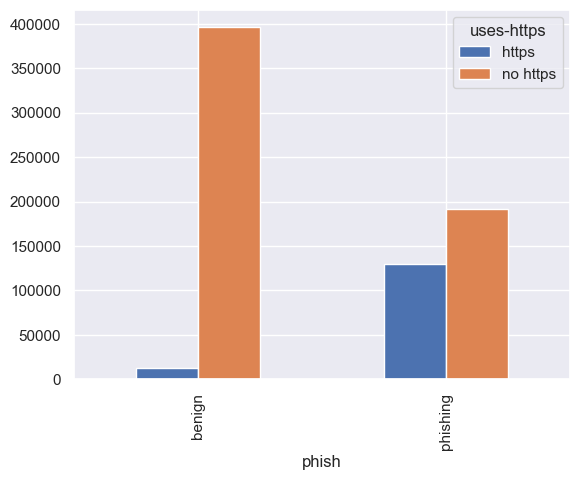

In [11]:
ct=pd.crosstab(index=df['phish'],columns=df['uses-https'])
ct.plot.bar()
stats.chi2_contingency(ct)

(269683.94642388704,
 0.0,
 1,
 array([[114805.08283198, 293807.91716802],
        [ 90350.91716802, 231225.08283198]]))

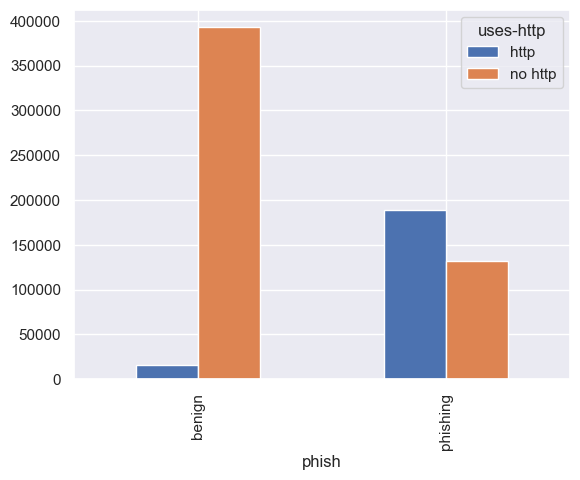

In [12]:
ct=pd.crosstab(index=df['phish'],columns=df['uses-http'])
ct.plot.bar()
stats.chi2_contingency(ct)

(6606.85755290382,
 0.0,
 1,
 array([[405626.42038705,   2986.57961295],
        [319225.57961295,   2350.42038705]]))

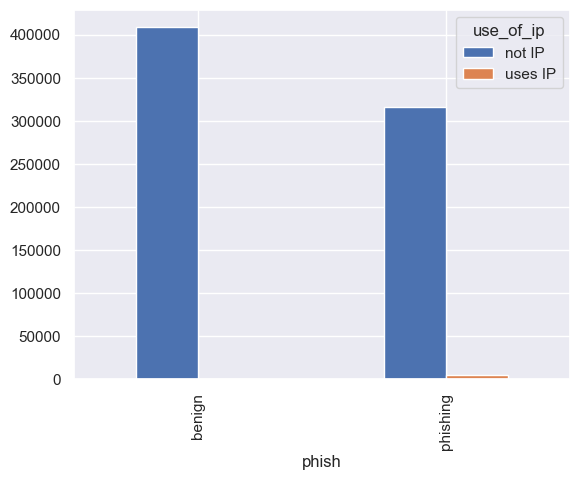

In [13]:
ct=pd.crosstab(index=df['phish'],columns=df['use_of_ip'])
ct.plot.bar()
stats.chi2_contingency(ct)

(937.3816969109646,
 7.339568824918285e-206,
 1,
 array([[383377.8852078,  25235.1147922],
        [301716.1147922,  19859.8852078]]))

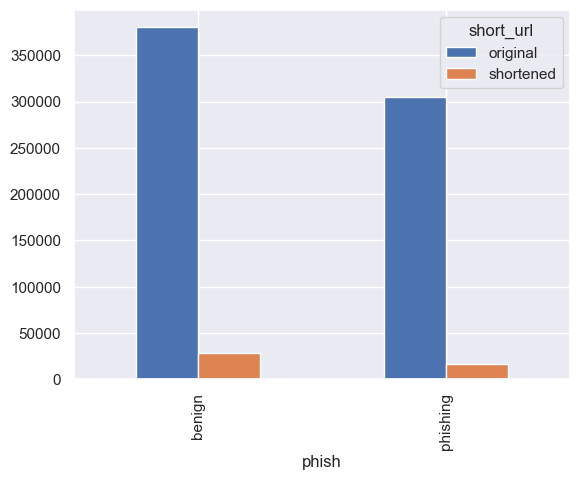

In [14]:
ct=pd.crosstab(index=df['phish'],columns=df['short_url'])
ct.plot.bar()
stats.chi2_contingency(ct)

### 7. Categorical Variable Analysis
From the bar graphs, there is a distinct difference in the number and proportion of URLs that use https or http. This correlates with the Chi-squared test value which is significantly higher for the 2 variables in comparison with the others. Hence, `uses-https` and `uses-http` are the top 2 categorical variables.